# Part 1a - Imports

Run this please

In [191]:
pip install ucimlrepo

In [192]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from collections import Counter
from operator import itemgetter
#the output of plotting commands is displayed inline within frontends
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace         #for debugging
import pandas as pd
from tqdm import tqdm
from google.colab import files



#it is important to set the seed for reproducibility as it initializes the random number generator
np.random.seed(1234)

In [193]:

from ucimlrepo import fetch_ucirepo

# fetch dataset
national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset = fetch_ucirepo(id=887)

# data (as pandas dataframes)
x_NHANES = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data.features
print(x_NHANES)
# print(type(x_NHANES))
y_NHANES = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data.targets
print(y_NHANES)
# print(type(y_NHANES))

# metadata
print(national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.metadata)
# print(type(national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.metadata))

# variable information
print(national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.variables)
# print(type(national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.variables))

# NHANES_df = NHANES_df.drop(NHANES_df[NHANES_df['PAQ605'] == 7].index)
y_NHANES = y_NHANES.replace("Senior", 0)
y_NHANES = y_NHANES.replace("Adult", 1)

NHANES_combined = pd.concat([x_NHANES, y_NHANES], axis=1)
print(f"\nnumber of duplicated rows : {NHANES_combined.duplicated().sum()}")

      RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  LBXIN
0          2.0     2.0    35.7   110.0     2.0   150.0  14.91
1          2.0     2.0    20.3    89.0     2.0    80.0   3.85
2          1.0     2.0    23.2    89.0     2.0    68.0   6.14
3          1.0     2.0    28.9   104.0     2.0    84.0  16.15
4          2.0     1.0    35.9   103.0     2.0    81.0  10.92
...        ...     ...     ...     ...     ...     ...    ...
2273       2.0     2.0    33.5   100.0     2.0    73.0   6.53
2274       1.0     2.0    30.0    93.0     2.0   208.0  13.02
2275       1.0     2.0    23.7   103.0     2.0   124.0  21.41
2276       2.0     2.0    27.4    90.0     2.0   108.0   4.99
2277       1.0     2.0    24.5   108.0     2.0   108.0   3.76

[2278 rows x 7 columns]
     age_group
0        Adult
1        Adult
2        Adult
3        Adult
4        Adult
...        ...
2273     Adult
2274     Adult
2275     Adult
2276     Adult
2277     Adult

[2278 rows x 1 columns]
{'uci_id': 887, 'name': 'N

In [194]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
x_BCW = breast_cancer_wisconsin_original.data.features
print(x_BCW)
# print(type(x_BCW))
y_BCW = breast_cancer_wisconsin_original.data.targets
print(y_BCW)
# print(type(y_BCW))
# metadata
print(breast_cancer_wisconsin_original.metadata)
# print(type(breast_cancer_wisconsin_original.metadata))
# variable information
print(breast_cancer_wisconsin_original.variables)
# print(type(breast_cancer_wisconsin_original.variables))

# print("Number of NANs is\n", x.isna().sum())
y_BCW = y_BCW.replace(2, 0)
y_BCW = y_BCW.replace(4, 1)

BCW_combined = pd.concat([x_BCW, y_BCW], axis=1)
print(f"\nnumber of  missing points : {BCW_combined.isna().sum().sum()} = {100*BCW_combined.duplicated().sum()/y_BCW.shape[0]}%")
# Fill NaN values with the mean of each column
x_BCW = x_BCW.fillna(x_BCW.mean())
print(f"\nnumber of duplicated rows : {BCW_combined.duplicated().sum()} = {100*BCW_combined.duplicated().sum()/y_BCW.shape[0]}%")

     Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
..               ...                      ...                       ...   
694                3                        1                         1   
695                2                        1                         1   
696                5                       10                        10   
697                4                        8                         6   
698                4                        8                         8   

     Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
0                    1         

# Part 1c - Basic Statistics

National health and nutrition healthy survey dataset

In [195]:
NHANES_df = pd.concat([x_NHANES, y_NHANES], axis=1)
grouped = NHANES_df.groupby(["age_group"]).mean()
sd_data = {}
# print(list(grouped.items()))
for column_name, row in grouped.items():
  if column_name == "SEQN":
    continue
  squared_difference = (row.iat[0] - row.iat[1])**2

  sd_data[column_name] = squared_difference

# Create df of new data
sd_df = pd.DataFrame.from_dict(sd_data, orient='index')

# Sort
sd_df.sort_values(by=[0], ascending=[False])

,0
LBXGLT,974.575736
LBXGLU,32.318625
LBXIN,2.894810
PAQ605,0.010645
BMXBMI,0.006728
DIQ010,0.000179
RIAGENDR,0.000014


In [196]:
x,y = x_NHANES, np.ravel(y_NHANES)

features_names = x_NHANES.columns.to_numpy()

# print(x.dtype)
x = np.array(x, dtype='float')

# Standardize the feature matrix
x_standardized = (x - x.mean(axis=0)) / x.std(axis=0)

pos_inds = (y==1)
pos_inds = pos_inds[:, np.newaxis]

neg_inds = np.logical_not(pos_inds)
broadcasting_mat = np.ones(x.shape)

pos_inds = pos_inds*broadcasting_mat
neg_inds = neg_inds*broadcasting_mat

pos_features = x_standardized*pos_inds
pos_meanfeatures = pos_features.sum(axis=0)/len(y[y==1])
neg_features = x_standardized*neg_inds
neg_meanfeatures = neg_features.sum(axis=0)/len(y[y==0])
# print(f"positive features mean {pos_meanfeatures}")
# print(f"negative features mean {neg_meanfeatures}")
# print(f"percentage of reletive differance for each feature is {100*abs(pos_meanfeatures-neg_meanfeatures)/neg_meanfeatures}")

sqd = (pos_meanfeatures-neg_meanfeatures)**2
# print(f"squered diffrence for each feature is {sqd}")

# Get the indices that would sort the data in descending order
sorted_indices = np.argsort(sqd)[::-1]

# Sort the data and features' names using the sorted indices
sorted_sqd = sqd[sorted_indices]
sorted_features = features_names[sorted_indices]

# Print the sorted sqds and features
print("Sorted squered diffrence for each standardized feature:):\n", np.column_stack((sorted_features, sorted_sqd.astype(str))))

Sorted squered diffrence for each standardized feature:):
 [['LBXGLT' '0.4402299366235675']
 ['LBXGLU' '0.10102548982007666']
 ['PAQ605' '0.06692335480615132']
 ['LBXIN' '0.03066086921625227']
 ['DIQ010' '0.0051908957546944355']
 ['BMXBMI' '0.00012808724333223076']
 ['RIAGENDR' '5.7031029661935726e-05']]


BCW dataset

In [197]:
BCW_df = pd.concat([x_BCW, y_BCW], axis=1)
grouped = BCW_df.groupby(["Class"]).mean()
sd_data = {}

for column_name, row in grouped.items():
  if column_name == "Sample code number":
    continue
  squared_difference = (row.iat[0] - row.iat[1])**2

  sd_data[column_name] = squared_difference

# Create df of new data
sd_df = pd.DataFrame.from_dict(sd_data, orient='index')

# Sort
sd_df.sort_values(by=[0], ascending=[False])


,0
Bare_nuclei,38.188727
Uniformity_of_cell_size,27.534017
Uniformity_of_cell_shape,26.183019
Normal_nucleoli,20.909380
Clump_thickness,17.966483
Marginal_adhesion,17.498234
Bland_chromatin,15.045217
Single_epithelial_cell_size,10.103929
Mitoses,2.328349


In [198]:
x,y = x_BCW, np.ravel(y_BCW)

features_names = x_BCW.columns.to_numpy()

# print(x.dtype)
x = np.array(x, dtype='float')

# Standardize the feature matrix
x_standardized = (x - x.mean(axis=0)) / x.std(axis=0)

pos_inds = (y==1)
pos_inds = pos_inds[:, np.newaxis]

neg_inds = np.logical_not(pos_inds)
broadcasting_mat = np.ones(x.shape)

pos_inds = pos_inds*broadcasting_mat
neg_inds = neg_inds*broadcasting_mat

pos_features = x_standardized*pos_inds
pos_meanfeatures = pos_features.sum(axis=0)/len(y[y==1])
neg_features = x_standardized*neg_inds
neg_meanfeatures = neg_features.sum(axis=0)/len(y[y==0])
# print(f"positive features mean {pos_meanfeatures}")
# print(f"negative features mean {neg_meanfeatures}")
# print(f"percentage of reletive differance for each feature is {100*abs(pos_meanfeatures-neg_meanfeatures)/neg_meanfeatures}")

sqd = (pos_meanfeatures-neg_meanfeatures)**2
# print(f"squered diffrence for each feature is {sqd}")

# Get the indices that would sort the data in descending order
sorted_indices = np.argsort(sqd)[::-1]

# Sort the data and features' names using the sorted indices
sorted_sqd = sqd[sorted_indices]
sorted_features = features_names[sorted_indices]

# Print the sorted sqds and features
print("Sorted squered diffrence for each standardized feature:):\n", np.column_stack((sorted_features, sorted_sqd.astype(str))))

Sorted squered diffrence for each standardized feature:):
 [['Uniformity_of_cell_shape' '2.9687208255278565']
 ['Uniformity_of_cell_size' '2.9612577755615046']
 ['Bare_nuclei' '2.947849389025624']
 ['Bland_chromatin' '2.5340958690035036']
 ['Clump_thickness' '2.2693397895942566']
 ['Normal_nucleoli' '2.245582260138751']
 ['Marginal_adhesion' '2.14925710972465']
 ['Single_epithelial_cell_size' '2.0636648944242544']
 ['Mitoses' '0.7926876663470129']]


# **Part II-B**:Implementation of DT

### Setup for Decision Tree

Decision Tree

In [199]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent
            self.num_classes = parent.num_classes           #copies the num classes from the parent

            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built


def greedy_test(node, cost_fn):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:
                continue
            #compute the left and right cost based on the current split
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    counts = np.bincount(labels)
    class_probs = counts / np.sum(counts)
    #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log2(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2

Decision tree

In [200]:

class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1):
        self.max_depth = max_depth
        self.root = None
        self.cost_fn = cost_fn
        self.num_classes = num_classes
        self.min_leaf_instances = min_leaf_instances

    def fit(self, data, labels):
        self.data = data
        self.labels = labels
        if self.num_classes is None:
            self.num_classes = np.max(labels) + 1
        #below are initialization of the root of the decision tree
        self.root = Node(np.arange(data.shape[0]), None)
        self.root.data = data
        self.root.labels = labels
        self.root.num_classes = self.num_classes
        self.root.depth = 0
        #to recursively build the rest of the tree
        self._fit_tree(self.root)
        return self

    def _fit_tree(self, node):
      #This gives the condition for termination of the recursion resulting in a leaf node
      if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
          return
      #greedily select the best test by minimizing the cost
      cost, split_feature, split_value = greedy_test(node, self.cost_fn)
      #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
      if np.isinf(cost):
          return
      #print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
      #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
      test = node.data[node.data_indices,split_feature] <= split_value
      #store the split feature and value of the node
      node.split_feature = split_feature
      node.split_value = split_value
      #define new nodes which are going to be the left and right child of the present node
      left = Node(node.data_indices[test], node)
      right = Node(node.data_indices[np.logical_not(test)], node)
      #recursive call to the _fit_tree()
      self._fit_tree(left)
      self._fit_tree(right)
      #assign the left and right child to present child
      node.left = left
      node.right = right

    def predict(self, data_test):
      class_probs = np.zeros((data_test.shape[0], self.num_classes))
      for n, x in enumerate(data_test):
          node = self.root
          #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
          while node.left:
              if x[node.split_feature] <= node.split_value:
                  node = node.left
              else:
                  node = node.right
          #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
          class_probs[n,:] = node.class_prob
      return class_probs

##set up for experimentation

evaluate accuracy

Best K tree depth for prediction test data

In [201]:
def best_depth(x_train, x_test, y_train, y_test, split, cost_fn):
  # train and validation split
  x_split = int(x_test.shape[0] * (1-split) / 2)
  X_test_ts, y_test_ts = x_test[:x_split], y_test[:x_split]
  X_test_va, y_test_va = x_test[x_split:], y_test[x_split:]

  model_choices=[]
  train_acc = []
  valid_acc = []

  n_train = y_train.shape[0]
  n_valid = y_test_va.shape[0]

  for k in range(1, 21):
      dt = DecisionTree(max_depth=k, cost_fn=cost_fn) # create a KNN object (OOP)

      y_train_tr_prob = dt.fit(x_train, y_train).predict(x_train)
      y_train_tr_pred = np.argmax(y_train_tr_prob, axis=-1)
      acc_tr = np.sum(y_train_tr_pred == y_train)/n_train

      y_train_va_prob = dt.fit(x_train, y_train).predict(X_test_va)
      y_train_va_pred = np.argmax(y_train_va_prob, axis=-1)
      acc_va = np.sum(y_train_va_pred == y_test_va)/n_valid

      model_choices.append(k)
      train_acc.append(acc_tr)
      valid_acc.append(acc_va)

  # use the best K to predict test data
  best_depth = model_choices[valid_acc.index(max(valid_acc))]
  dt = DecisionTree(max_depth=best_depth)
  y_test_prob = dt.fit(x_train, y_train).predict(X_test_ts)
  y_test_pred = np.argmax(y_test_prob, axis=-1)
  test_accuracy = np.sum(y_test_pred == y_test_ts)/y_test_ts.shape[0]
  print(f'best depth = {best_depth}, test accuracy = {test_accuracy}, train split = {(1-split)}, validation split = {(split) / 2}, test split = {(split) / 2}')

  plt.figure(figsize=(5, 3))
  plt.plot(model_choices, train_acc, marker='d', color='black', label='training')
  plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
  plt.plot(best_depth, test_accuracy, marker='*', color='red', label='testing')
  plt.xlabel("Tree depth")
  plt.ylabel("Accuracy")
  plt.legend(loc='best')
  plt.show()

ROC curve

In [202]:

def ROC_curve(x_train, x_test, y_train, y_test, cost_fn):
  model_choices = []

  for k in range(1, 11):
    # make decision tree and calculate acc
    dt = DecisionTree(max_depth=k, cost_fn=cost_fn)
    probs_test = dt.fit(x_train, y_train).predict(x_test)
    y_test_pred = np.argmax(probs_test, axis=-1)
    accuracy = np.sum(y_test_pred == y_test)/y_test.shape[0]
    model_choices.append((accuracy, k))

    fpr, tpr, thresholds = roc_curve(y_test, probs_test[:,-1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'AUC = {roc_auc:.2f} (K = {k})')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right' )
  plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='dummy AUC = 0.5')
  # plt.savefig(f'initial_{k}.png', bbox_inches='tight')
  plt.show()

  #do it again for highest acc
  accuracy, k = max(model_choices, key=itemgetter(0))

  print(f'best accuracy is {accuracy*100:.1f} at depth {k}.')
  print('')
  print(f'rest of the accuracies in this format (accuracy, depth)')
  for model in model_choices:
    print(model)

AUC, Accuracy based on K and cost functions

In [203]:
def AUC_curve(x_train, x_test,  y_train, y_test):
  distcost_subset = [(cost_misclassification, "cost misclassification"), (cost_entropy, "cost entropy"), (cost_gini_index, "cost gini index")]
  subset_K = np.arange(1, 30)

  auc_scores = np.zeros((len(distcost_subset),subset_K.shape[0]))
  accuracies = np.zeros((len(distcost_subset),subset_K.shape[0]))

  for i, (fn, fn_name) in enumerate(distcost_subset):
    for j,k in enumerate(subset_K):
        model = DecisionTree(max_depth=k, cost_fn=fn)
        probs_test = model.fit(x_train, y_train).predict(x_test)
        y_test_pred = np.argmax(probs_test, axis=-1)
        accuracy = np.sum(y_test_pred == y_test)/y_test.shape[0]
        accuracies[i,j] = 100*accuracy

        #boolean array to later slice the indexes of correct and incorrect predictions
        correct = y_test == y_test_pred
        incorrect = np.logical_not(correct)

        fpr, tpr, thresholds = roc_curve(y_test, probs_test[:,-1])
        auc_scores[i,j] = auc(fpr, tpr)
  max_index = np.unravel_index(np.argmax(auc_scores, axis=None), auc_scores.shape)

  max_aucs = (auc_scores == auc_scores.max())
  first_true_max_aucs = np.argmax(max_aucs, axis=1)
  max_accs = (auc_scores == auc_scores.max())
  first_true_max_accs = np.argmax(max_accs, axis=1)
  max_aucs_accs = (auc_scores == auc_scores.max()) & (accuracies == accuracies.max())
  first_true_max_aucs_accs = np.argmax(max_accs, axis=1)



  # Plotting
  plt.figure(figsize=(12, 8))
  for i, (fn, fn_name) in enumerate(distcost_subset):
      plt.plot(subset_K, auc_scores[i], lw=2, label=f"costfn = {fn_name}")
  plt.plot(np.arange(subset_K.min(),subset_K.max()+1), 0.5*np.ones((auc_scores.shape[1])), color='black', lw=2, linestyle='--', label='dummy AUC = 0.5')
  plt.xlabel('D (Tree Depth)')
  plt.ylabel('AUC')
  plt.title('AUC For Different cost Functions and K values')
  plt.legend()
  plt.show()

  print("\n")
  plt.figure(figsize=(12, 8))
  for i, (fn, fn_name) in enumerate(distcost_subset):
      plt.plot(subset_K, accuracies[i], lw=2, label=f"costfn = {fn_name}")
  plt.plot(np.arange(subset_K.min(),subset_K.max()+1), 50*np.ones((accuracies.shape[1])), color='black', lw=2, linestyle='--', label='dummy AUC = 0.5')
  plt.xlabel('D (Tree Depth)')
  plt.ylabel('Percentage of Accuracy')
  plt.title('Accuracy For Different cost Functions and K values')
  plt.legend()
  plt.show()



dfs

In [204]:
def dfs(visited, list_of_numbers, graph, node):
    if node not in visited:
        if node.left is not None and node.right is not None:
          list_of_numbers.append(node.split_feature)
        visited.add(node)
        if node.left is not None:
            dfs(visited, list_of_numbers, graph, node.left)
        if node.right is not None:
            dfs(visited, list_of_numbers, graph, node.right)

## NHANES

set the train and test variables (standardized variables) deafult at 50-50 split

In [205]:
x = x_NHANES.to_numpy()
y = np.ravel(y_NHANES)
#x = x_BCW.to_numpy()
#y = np.ravel(y_BCW)

(num_instances, num_features), num_classes = x.shape, np.max(y)+1
inds = np.random.permutation(num_instances)
#train-test split)

# standardize the feature matrix
x_standardized = (x - x.mean(axis=0)) / x.std(axis=0)
x_test_split = 0.5
x_train, x_test, y_train, y_test = train_test_split(x_standardized, y, test_size=x_test_split, random_state=42)

### experiment

#### AUC curve

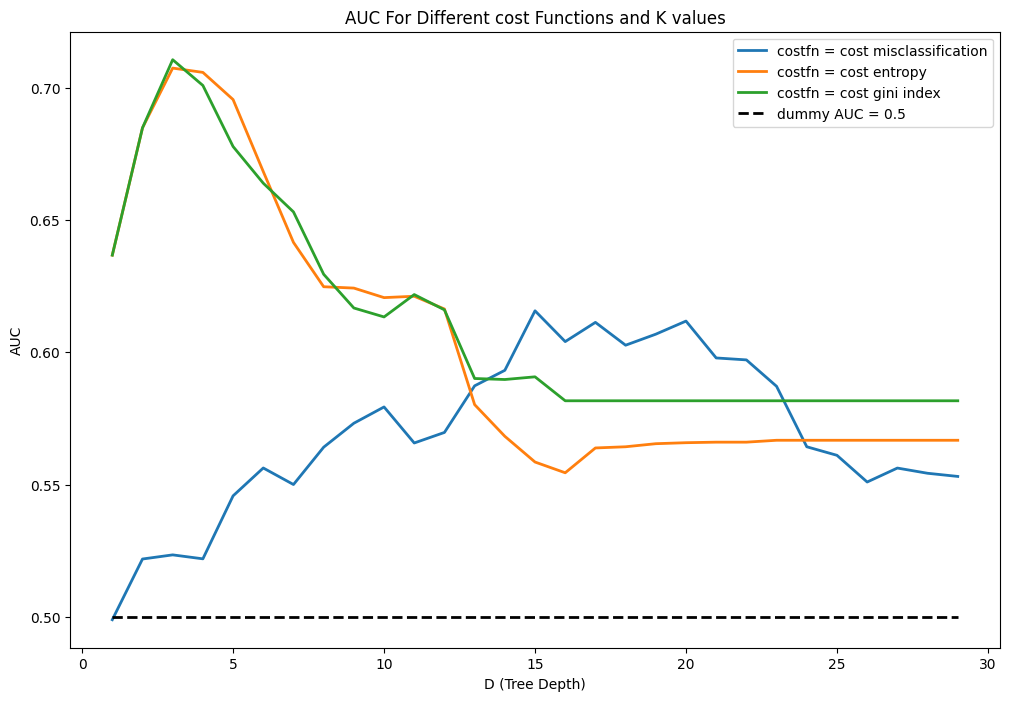

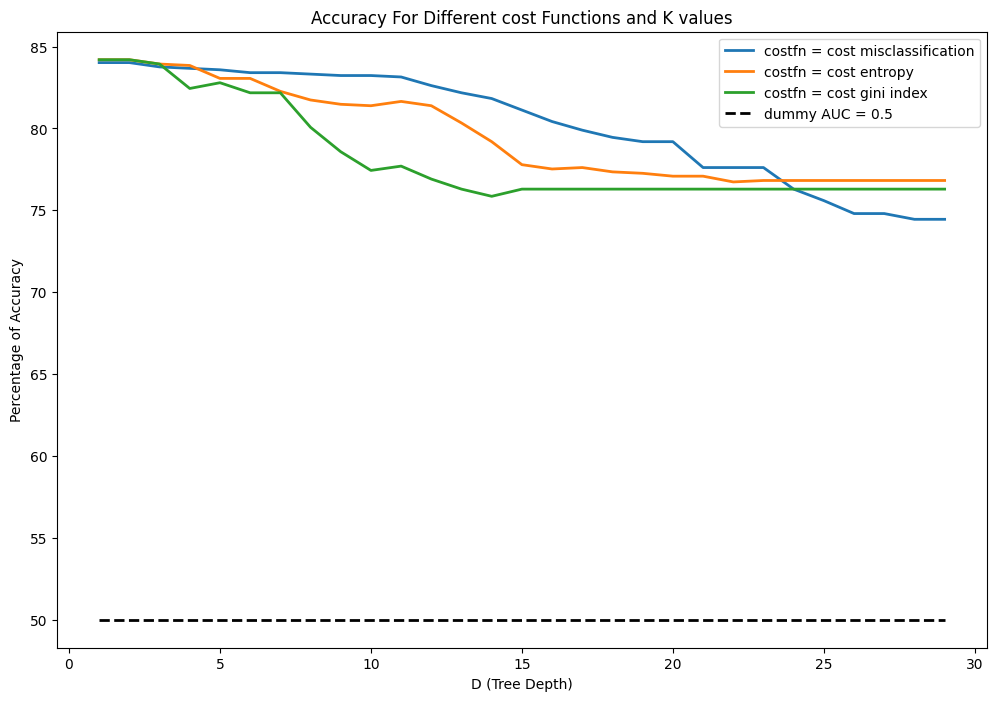

In [206]:
AUC_curve(x_train, x_test, y_train, y_test)

#### removing outliers

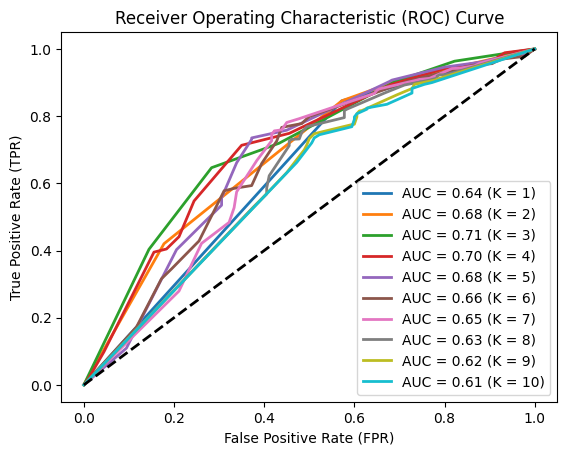

best accuracy is 84.2 at depth 1.

rest of the accuracies in this format (accuracy, depth)
(0.8419666374012291, 1)
(0.8419666374012291, 2)
(0.839332748024583, 3)
(0.8244073748902546, 4)
(0.8279192273924495, 5)
(0.8217734855136084, 6)
(0.8217734855136084, 7)
(0.800702370500439, 8)
(0.7857769973661106, 9)
(0.7743634767339772, 10)


In [207]:
x, y = x_NHANES.drop(index=x_NHANES[x_NHANES['PAQ605'] == 7].index), np.ravel(y_NHANES.drop(index=x_NHANES[x_NHANES['PAQ605'] == 7].index))
x = x_NHANES.to_numpy()
y = np.ravel(y_NHANES)
#x = x_BCW.to_numpy()
#y = np.ravel(y_BCW)

(num_instances, num_features), num_classes = x.shape, np.max(y)+1
inds = np.random.permutation(num_instances)
#train-test split)

# standardize the feature matrix
x_standardized = (x - x.mean(axis=0)) / x.std(axis=0)
x_test_split = 0.5
x_train, x_test, y_train, y_test = train_test_split(x_standardized, y, test_size=x_test_split, random_state=42)

ROC_curve(x_train, x_test, y_train, y_test, cost_gini_index)

#### gini  cost function

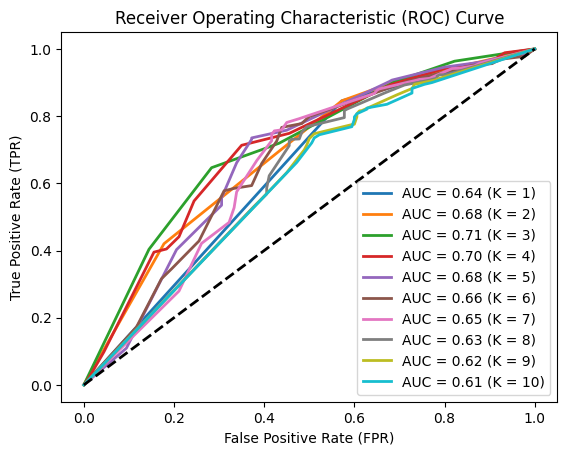

best accuracy is 84.2 at depth 1.

rest of the accuracies in this format (accuracy, depth)
(0.8419666374012291, 1)
(0.8419666374012291, 2)
(0.839332748024583, 3)
(0.8244073748902546, 4)
(0.8279192273924495, 5)
(0.8217734855136084, 6)
(0.8217734855136084, 7)
(0.800702370500439, 8)
(0.7857769973661106, 9)
(0.7743634767339772, 10)


In [208]:
ROC_curve(x_train, x_test, y_train, y_test, cost_gini_index)

#### use validation set to select the best tree depth

best depth = 4, test accuracy = 0.8529411764705882, train split = 0.9, validation split = 0.05, test split = 0.05


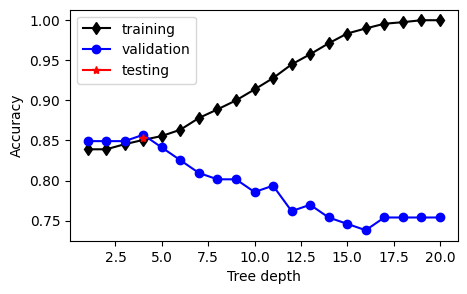

best depth = 1, test accuracy = 0.8516483516483516, train split = 0.8, validation split = 0.1, test split = 0.1


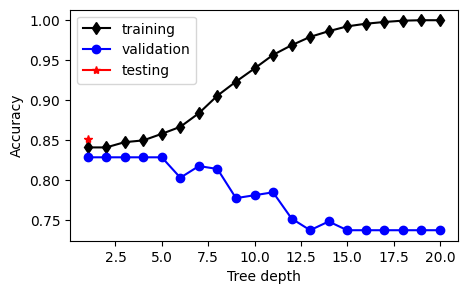

best depth = 3, test accuracy = 0.8535564853556485, train split = 0.7, validation split = 0.15, test split = 0.15


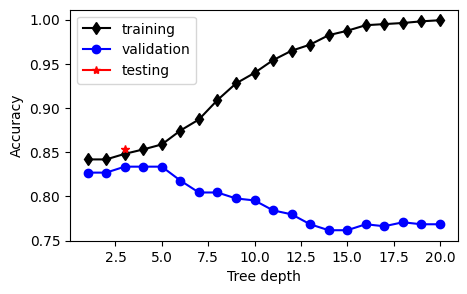

best depth = 3, test accuracy = 0.8461538461538461, train split = 0.6, validation split = 0.2, test split = 0.2


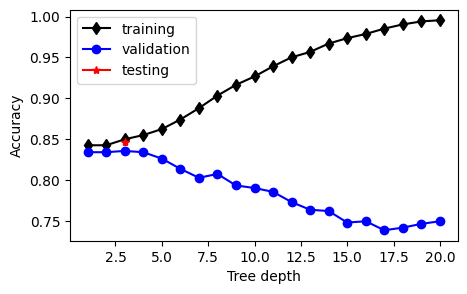

best depth = 1, test accuracy = 0.8450704225352113, train split = 0.5, validation split = 0.25, test split = 0.25


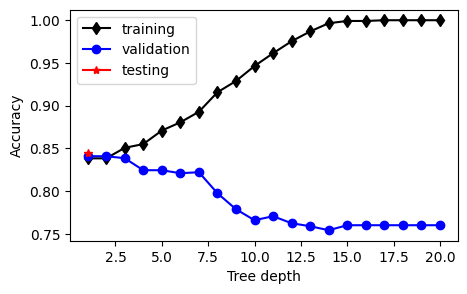

In [209]:
x_test_split = 0.10
x_train, x_test, y_train, y_test = train_test_split(x_standardized, y, test_size=x_test_split, random_state=42)
best_depth(x_train, x_test, y_train, y_test, x_test_split, cost_gini_index)
x_test_split = 0.20
x_train, x_test, y_train, y_test = train_test_split(x_standardized, y, test_size=x_test_split, random_state=42)
best_depth(x_train, x_test, y_train, y_test, x_test_split, cost_gini_index)
x_test_split = 0.30
x_train, x_test, y_train, y_test = train_test_split(x_standardized, y, test_size=x_test_split, random_state=42)
best_depth(x_train, x_test, y_train, y_test, x_test_split, cost_gini_index)
x_test_split = 0.40
x_train, x_test, y_train, y_test = train_test_split(x_standardized, y, test_size=x_test_split, random_state=42)
best_depth(x_train, x_test, y_train, y_test, x_test_split, cost_gini_index)
x_test_split = 0.5
x_train, x_test, y_train, y_test = train_test_split(x_standardized, y, test_size=x_test_split, random_state=42)
best_depth(x_train, x_test, y_train, y_test, x_test_split, cost_gini_index)

#### Feature importance score (top 5) (max_depth of 1 based on best result on previous result)

In [210]:
list_of_numbers = []
visited = set()

dt = DecisionTree(max_depth=50, cost_fn=cost_gini_index)
dt.fit(x_train, y_train).predict(x_test)

dfs(visited, list_of_numbers, dt, dt.root)

print("format: (feature number, number of occurences)")
print(Counter(list_of_numbers).most_common()[:5])


format: (feature number, number of occurences)
[(2, 781), (3, 101), (0, 76), (1, 53), (5, 33)]


## BCW


set the train and test variables (standardized variables)

In [211]:
x = x_BCW.to_numpy()
y = np.ravel(y_BCW)

(num_instances, num_features), num_classes = x.shape, np.max(y)+1
inds = np.random.permutation(num_instances)
#train-test split)

# Normalize the feature matrix
x_standardized = (x - x.mean(axis=0)) / x.std(axis=0)

x_train, x_test, y_train, y_test = train_test_split(x_standardized, y, test_size=0.5, random_state=42)
x_train_split = x_train.shape[0]

### experiment

####AUC curve

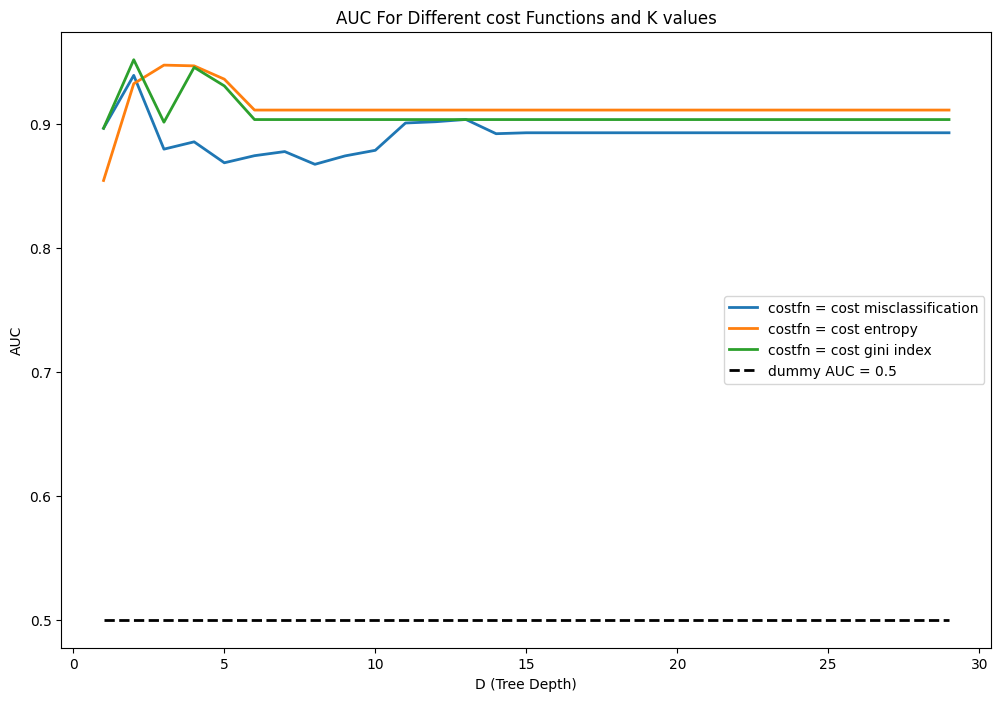

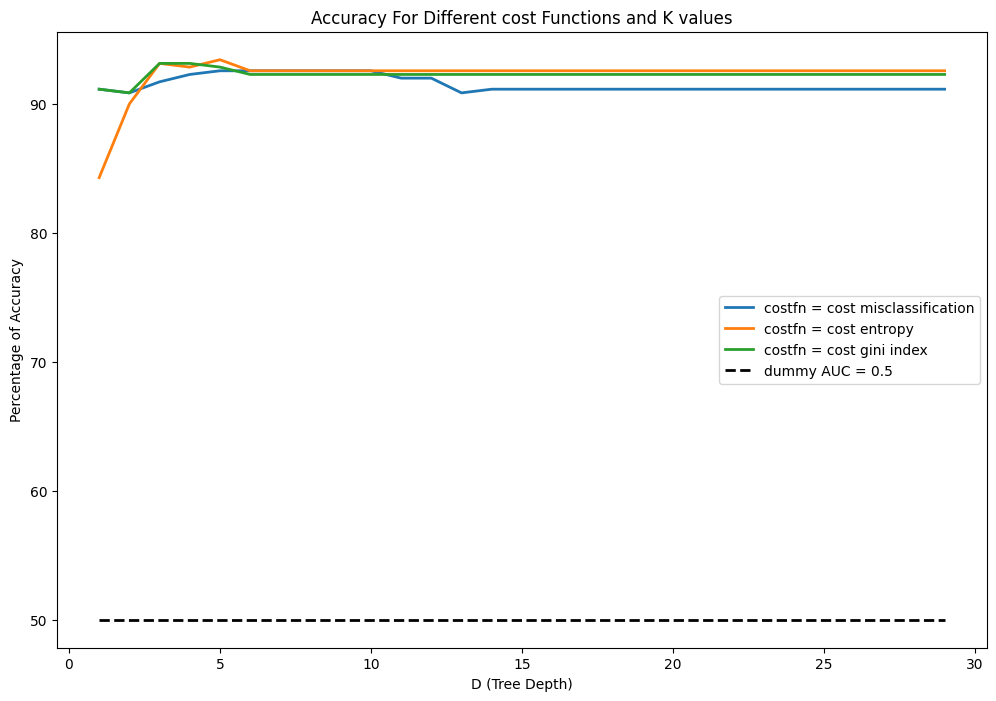

In [212]:
AUC_curve(x_train, x_test, y_train, y_test)

#### remove duplicates

In [213]:
BCW_combined = pd.concat([x_BCW, y_BCW], axis=1)
# Identify and drop duplicate rows based on features and drop
BCW_cleaned = BCW_combined.drop_duplicates()

x,y = BCW_cleaned[x_BCW.columns].to_numpy(), np.ravel(BCW_cleaned[y_BCW.columns])

(num_instances, num_features), num_classes = x.shape, np.max(y)+1
inds = np.random.permutation(num_instances)
#train-test split)

# Normalize the feature matrix
x_standardized = (x - x.mean(axis=0)) / x.std(axis=0)

x_train, x_test, y_train, y_test = train_test_split(x_standardized, y, test_size=0.5, random_state=42)
x_train_split = x_train.shape[0]

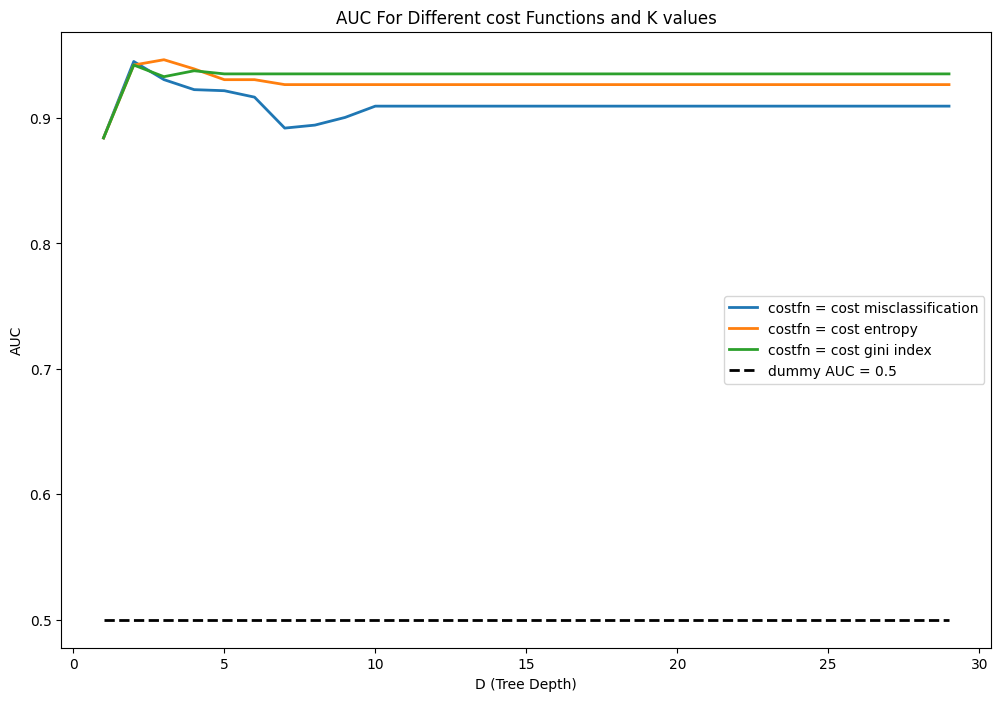

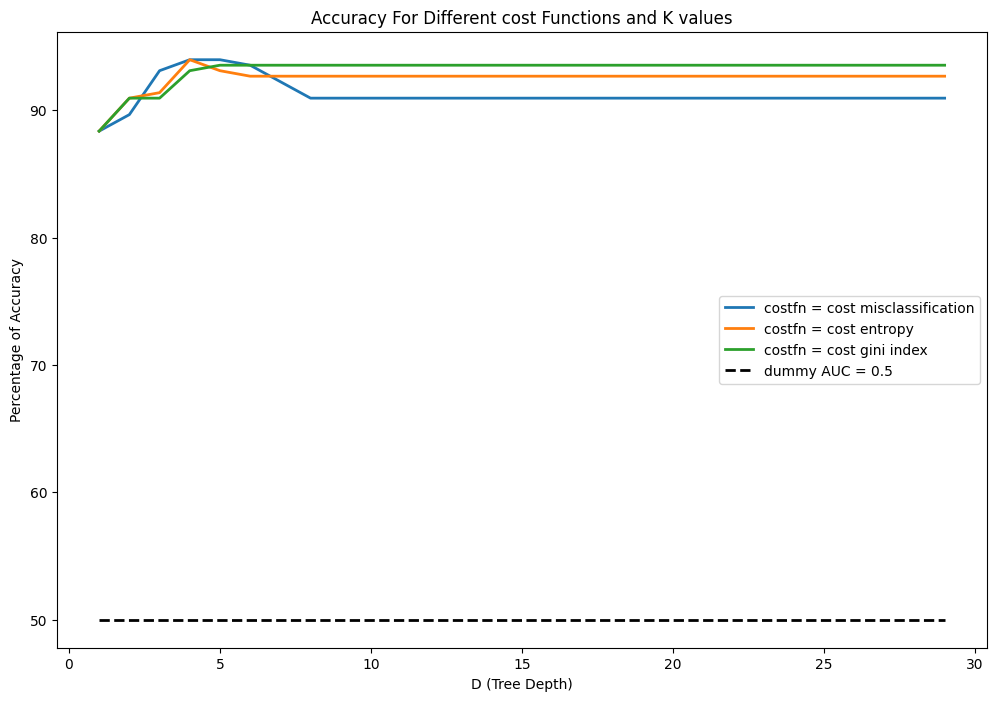

In [214]:
AUC_curve(x_train, x_test, y_train, y_test)

####gini index cost function

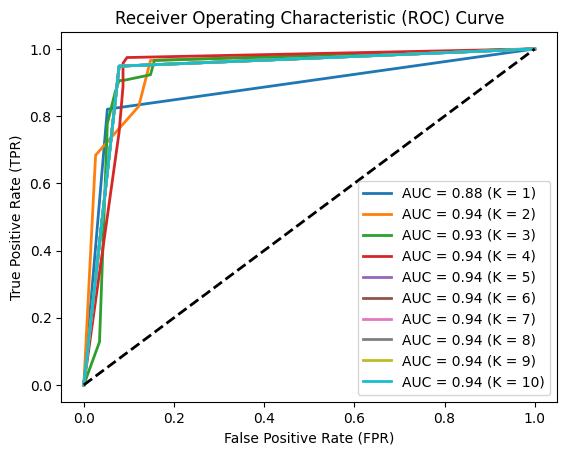

best accuracy is 93.5 at depth 5.

rest of the accuracies in this format (accuracy, depth)
(0.8836206896551724, 1)
(0.9094827586206896, 2)
(0.9094827586206896, 3)
(0.9310344827586207, 4)
(0.9353448275862069, 5)
(0.9353448275862069, 6)
(0.9353448275862069, 7)
(0.9353448275862069, 8)
(0.9353448275862069, 9)
(0.9353448275862069, 10)


In [215]:
ROC_curve(x_train, x_test, y_train, y_test, cost_gini_index)

####use validation set to select the best K and the best tree depth

best depth = 2, test accuracy = 0.7619047619047619, train split = 0.9, validation split = 0.05, test split = 0.05


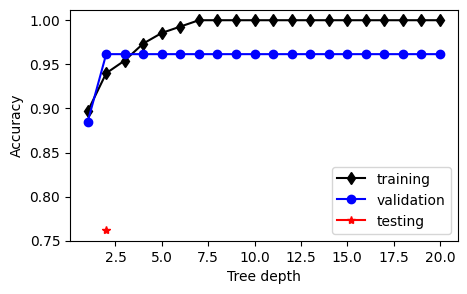

best depth = 3, test accuracy = 0.8648648648648649, train split = 0.8, validation split = 0.1, test split = 0.1


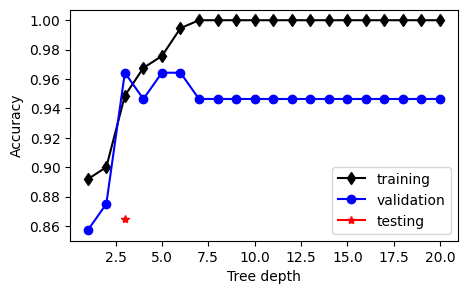

best depth = 5, test accuracy = 0.9375, train split = 0.7, validation split = 0.15, test split = 0.15


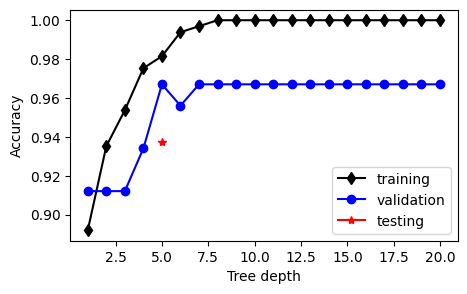

best depth = 6, test accuracy = 0.9090909090909091, train split = 0.6, validation split = 0.2, test split = 0.2


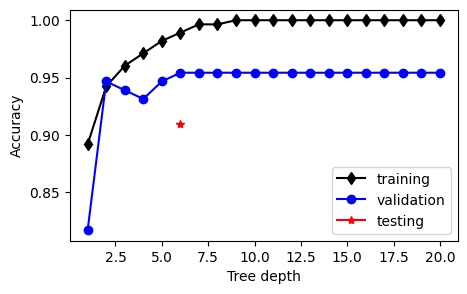

best depth = 5, test accuracy = 0.9137931034482759, train split = 0.5, validation split = 0.25, test split = 0.25


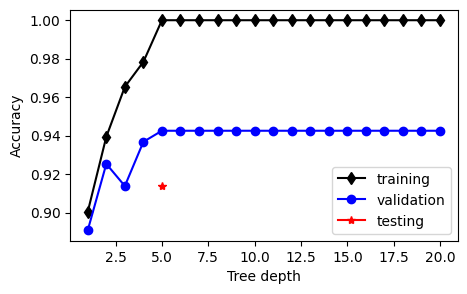

In [216]:
x_test_split = 0.10
x_train, x_test, y_train, y_test = train_test_split(x_standardized, y, test_size=x_test_split, random_state=42)
best_depth(x_train, x_test, y_train, y_test, x_test_split, cost_gini_index)
x_test_split = 0.20
x_train, x_test, y_train, y_test = train_test_split(x_standardized, y, test_size=x_test_split, random_state=42)
best_depth(x_train, x_test, y_train, y_test, x_test_split, cost_gini_index)
x_test_split = 0.30
x_train, x_test, y_train, y_test = train_test_split(x_standardized, y, test_size=x_test_split, random_state=42)
best_depth(x_train, x_test, y_train, y_test, x_test_split, cost_gini_index)
x_test_split = 0.40
x_train, x_test, y_train, y_test = train_test_split(x_standardized, y, test_size=x_test_split, random_state=42)
best_depth(x_train, x_test, y_train, y_test, x_test_split, cost_gini_index)
x_test_split = 0.5
x_train, x_test, y_train, y_test = train_test_split(x_standardized, y, test_size=x_test_split, random_state=42)
best_depth(x_train, x_test, y_train, y_test, x_test_split, cost_gini_index)

#### Feature importance score (top 5) max depth based on best accuracy of previous accuracy

In [217]:
list_of_numbers = []
visited = set()

dt = DecisionTree(max_depth=50)
dt.fit(x_train, y_train).predict(x_test)

dfs(visited, list_of_numbers, dt, dt.root)

print("format: (feature number, number of occurences)")
print(Counter(list_of_numbers).most_common()[:5])


format: (feature number, number of occurences)
[(0, 60), (1, 45), (2, 45), (3, 26), (4, 19)]


# **Part II-A:** Implementation of KNN




In [218]:
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
minkowski = lambda x1, x2: np.power(np.sum(np.power(np.abs(x1 - x2), 3), axis=-1), 1/3)      # p = 3
cosine = lambda x1, x2: 1 - np.dot(x1, x2.T) / (np.sqrt(np.sum(x1**2, axis=1))[:, np.newaxis] * np.sqrt(np.sum(x2**2, axis=1))[np.newaxis, :])
correlation = lambda x1, x2: 1 - np.dot(x1 - x1.mean(1)[:, None], (x2 - x2.mean(1)[:, None]).T) / np.sqrt(np.dot(((x1 - x1.mean(1)[:, None])**2).sum(1)[:, None], ((x2 - x2.mean(1)[:, None])**2).sum(1)[None]))



class KNN:
    def __init__(self, K=1, dist_fn= euclidean):
        self.dist_fn = dist_fn
        self.K = K
        return

    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = len(np.unique(y))
        return self

    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        num_test = x_test.shape[0]
        num_train = self.x.shape[0]



        # calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
        if self.dist_fn == correlation:
            distances = correlation(x_test, self.x)
        elif self.dist_fn == cosine:
            distances = self.dist_fn(x_test, self.x)
        else:
            distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])

        # print(distances.shape, self.x[None,:,:].shape, x_test[:,None,:].shape)
        #ith-row of knns stores the indices of k closest training samples to the ith-test sample
        knns = np.zeros((num_test, self.K), dtype=int)
        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            # print(distances)
            # print(np.argsort(distances[i])[:self.K])
            knns[i,:] = np.argsort(distances[i])[:self.K]
            # print(self.y[knns[i,:]], self.C, type(self.y[knns[i,:]]), type(self.C))
            # print(knns[i,:],self.y[knns[i,:]])
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counts the number of instances of each class in the K-closest training samples
        y_prob = y_prob/self.K
        #To get hard predictions by choosing the class with the maximum probability
        y_pred = np.argmax(y_prob, axis=-1)
        return y_pred, y_prob, knns

def evaluate_acc(y_test, y_pred):
    accuracy = np.sum(y_pred == y_test)/len(y_test)
    return accuracy

# **Part II-C:** Implementation of Weighted KNN


In [219]:
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
minkowski = lambda x1, x2: np.power(np.sum(np.power(np.abs(x1 - x2), 3), axis=-1), 1/3)      # p = 3
cosine = lambda x1, x2: 1 - np.dot(x1, x2.T) / (np.sqrt(np.sum(x1**2, axis=1))[:, np.newaxis] * np.sqrt(np.sum(x2**2, axis=1))[np.newaxis, :])
correlation = lambda x1, x2: 1 - np.dot(x1 - x1.mean(1)[:, None], (x2 - x2.mean(1)[:, None]).T) / np.sqrt(np.dot(((x1 - x1.mean(1)[:, None])**2).sum(1)[:, None], ((x2 - x2.mean(1)[:, None])**2).sum(1)[None]))



class Weighted_KNN:
    def __init__(self, K=1, dist_fn= euclidean):
        self.dist_fn = dist_fn
        self.K = K
        return

    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = len(np.unique(y))
        return self

    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        num_test = x_test.shape[0]
        num_train = self.x.shape[0]



        # calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
        if self.dist_fn == correlation:
            distances = correlation(x_test, self.x)
        elif self.dist_fn == cosine:
            distances = self.dist_fn(x_test, self.x)
        else:
            distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])

        # print(distances.shape, self.x[None,:,:].shape, x_test[:,None,:].shape)
        #ith-row of knns stores the indices of k closest training samples to the ith-test sample
        knns = np.zeros((num_test, self.K), dtype=int)
        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            # print(distances)
            # print(np.argsort(distances[i])[:self.K])
            knns[i,:] = np.argsort(distances[i])[:self.K]
            # Use inverse distances as weights
            weights = 1 / (distances[i, knns[i, :]] )
            # weights = 1 / np.sqrt(distances[i, knns[i, :]])
            # weights = np.exp(-0.5 * (distances[i, knns[i, :]] ** 2) / (1 ** 2))

            # print(self.y[knns[i,:]], self.C, type(self.y[knns[i,:]]), type(self.C))
            # print(knns[i,:],self.y[knns[i,:]])
            y_prob[i, :] = np.bincount(self.y[knns[i, :]], weights=weights, minlength=self.C) #counts the number of instances of each class in the K-closest training samples when waits other than zero probabilities are based on weights

        # Normalize by the sum of weights to get probabilities
        y_prob = y_prob / np.sum(weights)
        #To get hard predictions by choosing the class with the maximum probability
        y_pred = np.argmax(y_prob, axis=-1)
        return y_pred, y_prob, knns

def evaluate_acc(y_test, y_pred):
    accuracy = np.sum(y_pred == y_test)/len(y_test)
    return accuracy

### **NHANES dataset train-test split**




In [220]:
x,y = x_NHANES, np.ravel(y_NHANES)
x = np.array(x, dtype='float')
y = np.array(y, dtype='int')

# print(len(y[(y != 0) & (y != 1)]))

# Standardize the feature matrix
x_standardized = (x - x.mean(axis=0)) / x.std(axis=0)

x_train, x_test, y_train, y_test = train_test_split(x_standardized, y, test_size=0.5, random_state=42)
# len(NHANES_df)

### **Run the experiment for different k**



For K = 1 accuracy is 78.2.


For K = 2 accuracy is 72.1.


For K = 5 accuracy is 83.1.


For K = 10 accuracy is 83.6.


For K = 20 accuracy is 84.7.



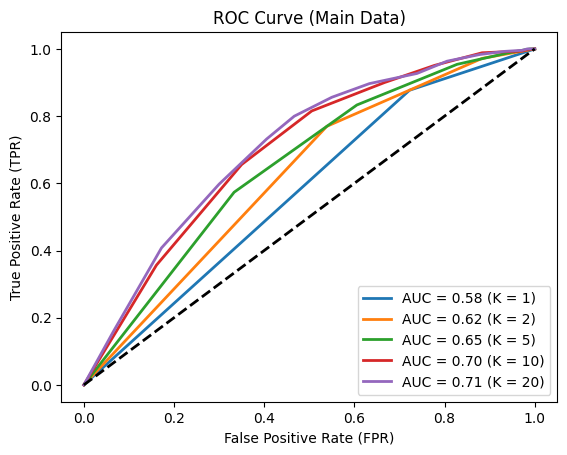

In [221]:
subset_K = np.array([1,2,5,10,20])
for k in subset_K:
  model = KNN(K=k)
  y_pred, y_prob, knns = model.fit(x_train, y_train).predict(x_test)
  # print('knns shape:', knns.shape)
  # print('y_prob shape:', y_prob.shape)

  accuracy = evaluate_acc(y_test, y_pred)
  print(f'\nFor K = {k} accuracy is {accuracy*100:.1f}.\n')

  #boolean array to later slice the indexes of correct and incorrect predictions
  correct = y_test == y_pred
  incorrect = np.logical_not(correct)

  fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,-1])
  roc_auc = auc(fpr, tpr)

  # Plotting the ROC curve
  plt.plot(fpr, tpr, lw=2, label=f'AUC = {roc_auc:.2f} (K = {k})')
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title('ROC Curve (Main Data)')
  plt.legend(loc='lower right' )
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='dummy AUC = 0.5')
# plt.savefig(f'nh_initial.png', bbox_inches='tight')
plt.show()
# files.download(f'nh_initial.png')

### **Dropping the outliers**


For K = 1 accuracy is 79.1.


For K = 2 accuracy is 73.0.


For K = 5 accuracy is 83.4.


For K = 10 accuracy is 83.8.


For K = 20 accuracy is 83.9.



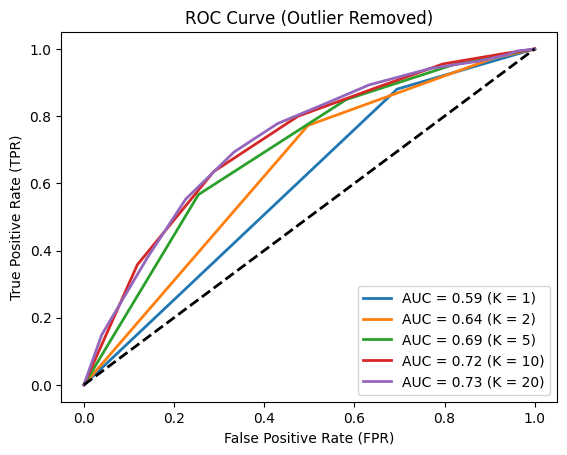

In [222]:
x,y = x_NHANES.drop(index=x_NHANES[x_NHANES['PAQ605'] == 7].index), np.ravel(y_NHANES.drop(index=x_NHANES[x_NHANES['PAQ605'] == 7].index))
x = np.array(x, dtype='float')
y = np.array(y, dtype='int')

# Standardize the feature matrix
x_standardized = (x - x.mean(axis=0)) / x.std(axis=0)

x_train, x_test, y_train, y_test = train_test_split(x_standardized, y, test_size=0.5, random_state=42)
# len(NHANES_df)

subset_K = np.array([1,2,5,10,20])
for k in subset_K:
  model = KNN(K=k)
  y_pred, y_prob, knns = model.fit(x_train, y_train).predict(x_test)
  # print('knns shape:', knns.shape)
  # print('y_prob shape:', y_prob.shape)

  accuracy = evaluate_acc(y_test, y_pred)
  print(f'\nFor K = {k} accuracy is {accuracy*100:.1f}.\n')

  #boolean array to later slice the indexes of correct and incorrect predictions
  correct = y_test == y_pred
  incorrect = np.logical_not(correct)

  fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,-1])
  roc_auc = auc(fpr, tpr)

  # Plotting the ROC curve
  plt.plot(fpr, tpr, lw=2, label=f'AUC = {roc_auc:.2f} (K = {k})')
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title('ROC Curve (Outlier Removed)')
  plt.legend(loc='lower right' )
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='dummy AUC = 0.5')
# plt.savefig(f'nh_drop.png', bbox_inches='tight')
plt.show()
# files.download(f'nh_drop.png')


### **Effect of feature selection: A1) Using the mean (NHANES Dataset)**

---


  



For K = 1 accuracy is 77.5.


For K = 2 accuracy is 70.9.


For K = 5 accuracy is 83.4.


For K = 10 accuracy is 84.7.


For K = 20 accuracy is 84.1.



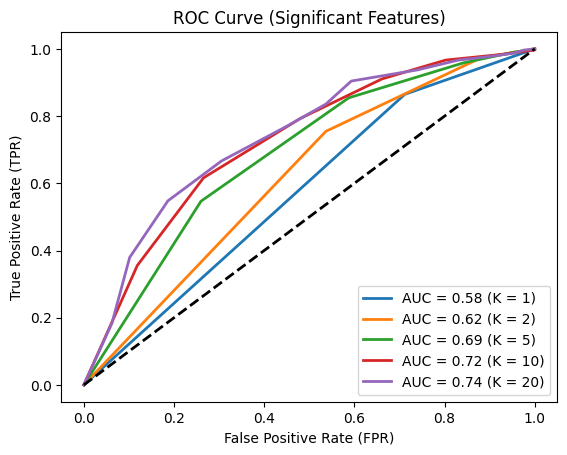

In [223]:
x,y = x_NHANES.drop(index=x_NHANES[x_NHANES['PAQ605'] == 7].index), np.ravel(y_NHANES.drop(index=x_NHANES[x_NHANES['PAQ605'] == 7].index))
x = np.array(x, dtype='float')
y = np.array(y, dtype='int')

# Standardize the feature matrix
x_standardized = (x - x.mean(axis=0)) / x.std(axis=0)

# feature RIAGENDR has a low mean differnce therefor we omit them
selected_x_standardized = np.delete(x_standardized, [0], axis=1)

x_train, x_test, y_train, y_test = train_test_split(selected_x_standardized, y, test_size=0.5, random_state=42)

subset_K = np.array([1,2,5,10,20])
for k in subset_K:
  model = KNN(K=k)
  y_pred, y_prob, knns = model.fit(x_train, y_train).predict(x_test)
  # print('knns shape:', knns.shape)
  # print('y_prob shape:', y_prob.shape)

  accuracy = evaluate_acc(y_test, y_pred)
  print(f'\nFor K = {k} accuracy is {accuracy*100:.1f}.\n')

  #boolean array to later slice the indexes of correct and incorrect predictions
  correct = y_test == y_pred
  incorrect = np.logical_not(correct)

  fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,-1])
  roc_auc = auc(fpr, tpr)

  # Plotting the ROC curve
  plt.plot(fpr, tpr, lw=2, label=f'AUC = {roc_auc:.2f} (K = {k})')
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title('ROC Curve (Significant Features)')
  plt.legend(loc='lower right' )
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='dummy AUC = 0.5')
# plt.savefig(f'nh_mean.png', bbox_inches='tight')
plt.show()
# files.download(f'nh_mean.png')



### **Effect of feature selection: A2) Using the correlation (NHANES Dataset)**


In [224]:
x,y = x_NHANES.drop(index=x_NHANES[x_NHANES['PAQ605'] == 7].index), np.ravel(y_NHANES.drop(index=x_NHANES[x_NHANES['PAQ605'] == 7].index))

x = np.array(x, dtype='float')
y = np.array(y, dtype='int')

# Standardize the feature matrix
x_standardized = (x - x.mean(axis=0)) / x.std(axis=0)

num_features = x_standardized.shape[1]
features_names = x_NHANES.columns.to_numpy()
features_corr_abs = abs(np.array([np.corrcoef(x_standardized[:, i], y)[0, 1] for i in range(num_features)]))

# Get the indices that would sort the data in descending order
sorted_indices = np.argsort(features_corr_abs)[::-1]

# Sort the data and features' names using the sorted indices
sorted_features_corr_abs = features_corr_abs[sorted_indices]
sorted_features = features_names[sorted_indices]
print("Sorted correlation coef for each standardized feature:):\n", np.column_stack((sorted_features, sorted_features_corr_abs.astype(str))))

Sorted correlation coef for each standardized feature:):
 [['LBXGLT' '0.24298134431403975']
 ['LBXGLU' '0.11658724665403808']
 ['PAQ605' '0.10109168089269244']
 ['LBXIN' '0.0643203944847926']
 ['DIQ010' '0.02638347628704658']
 ['BMXBMI' '0.004329062699547925']
 ['RIAGENDR' '0.0029638407579788847']]


### **Run the experiment for different distance functions**



For distfn = manhattan accuracy is 84.0.


For distfn = euclidean accuracy is 84.7.


For distfn = minkowski accuracy is 84.5.


For distfn = cosine accuracy is 85.3.


For distfn = correlation accuracy is 84.9.



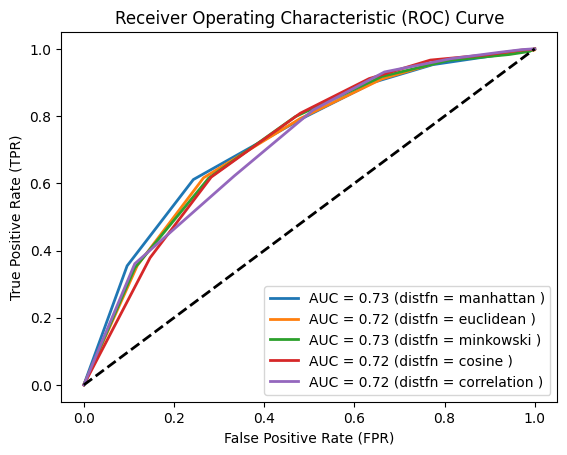

In [225]:
x,y = x_NHANES.drop(index=x_NHANES[x_NHANES['PAQ605'] == 7].index), np.ravel(y_NHANES.drop(index=x_NHANES[x_NHANES['PAQ605'] == 7].index))
x = np.array(x, dtype='float')
y = np.array(y, dtype='int')

# Standardize the feature matrix
x_standardized = (x - x.mean(axis=0)) / x.std(axis=0)

# feature RIAGENDR has a low mean differnce therefor we omit them
selected_x_standardized = np.delete(x_standardized, [0], axis=1)

x_train, x_test, y_train, y_test = train_test_split(selected_x_standardized, y, test_size=0.5, random_state=42)

distfn_subset = [(manhattan,"manhattan"), (euclidean,"euclidean"), (minkowski,"minkowski"), (cosine,"cosine"), (correlation,"correlation")]

k = 10
for (fn,fn_name) in distfn_subset:
  model = KNN(K=k, dist_fn=fn)
  y_pred, y_prob, knns = model.fit(x_train, y_train).predict(x_test)

  # print('knns shape:', knns.shape)
  # print('y_prob shape:', y_prob.shape)

  accuracy = evaluate_acc(y_test, y_pred)
  print(f'\nFor distfn = {fn_name} accuracy is {accuracy*100:.1f}.\n')

  #boolean array to later slice the indexes of correct and incorrect predictions
  correct = y_test == y_pred
  incorrect = np.logical_not(correct)

  fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,-1])
  roc_auc = auc(fpr, tpr)


  # Plotting the ROC curve
  plt.plot(fpr, tpr, lw=2, label=f'AUC = {roc_auc:.2f} (distfn = {fn_name} )')
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right' )
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='dummy AUC = 0.5')
# plt.savefig(f'nh_dist.png', bbox_inches='tight')
plt.show()
# files.download(f'nh_dist.png')

### **AUC, Accuracy based on K and distance functions**


5it [02:40, 32.13s/it]


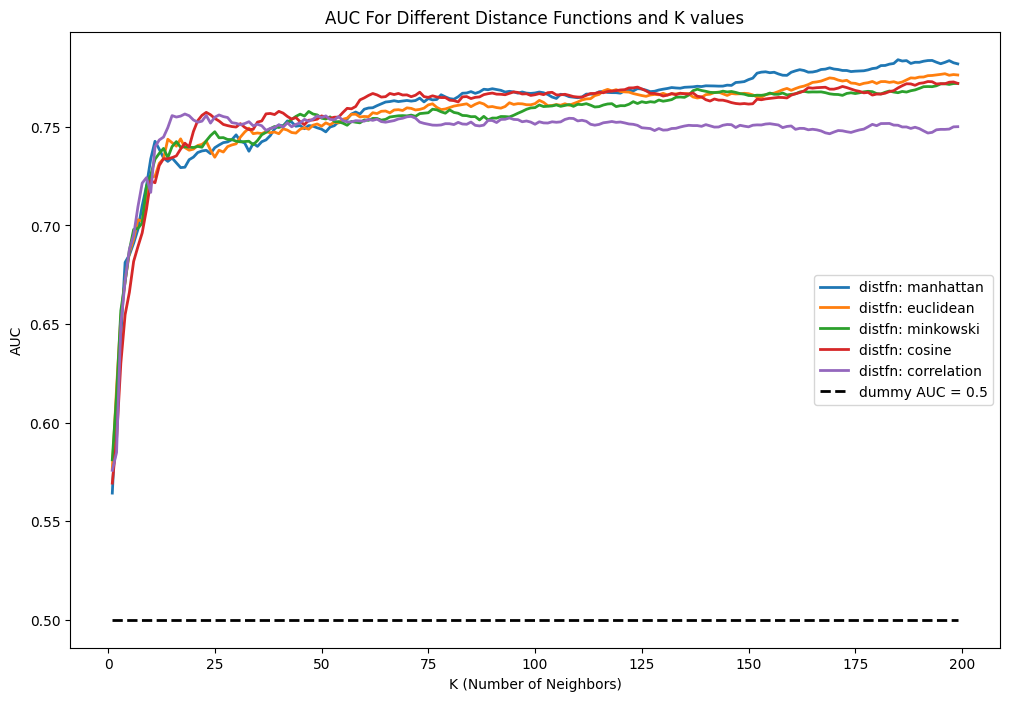

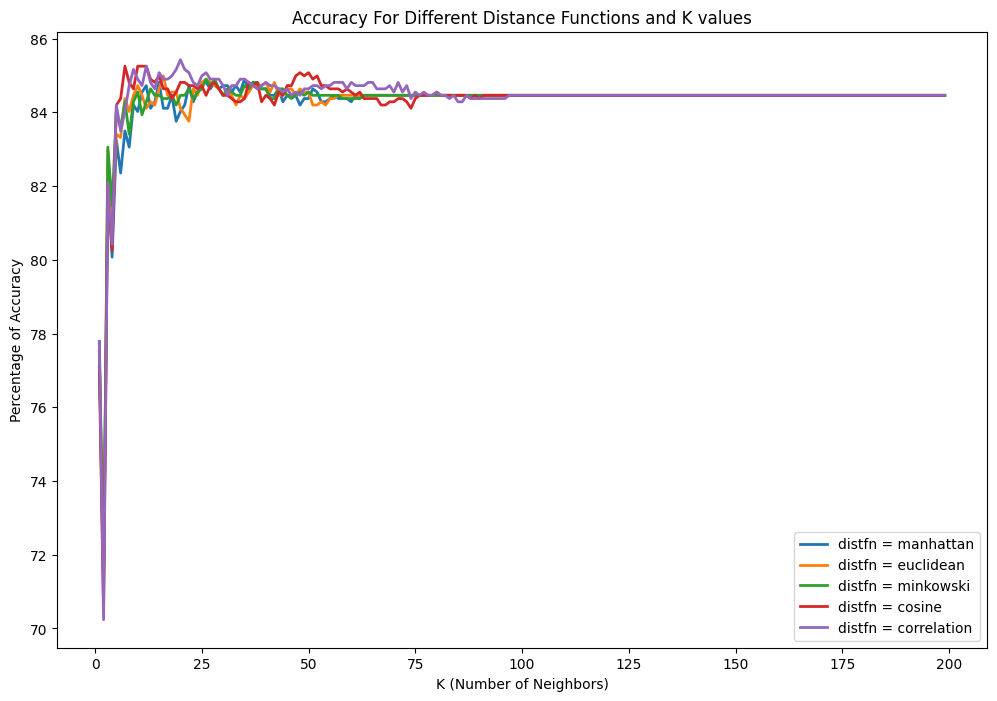

In [226]:
x,y = x_NHANES.drop(index=x_NHANES[x_NHANES['PAQ605'] == 7].index), np.ravel(y_NHANES.drop(index=x_NHANES[x_NHANES['PAQ605'] == 7].index))
x = np.array(x, dtype='float')
y = np.array(y, dtype='int')

# Standardize the feature matrix
x_standardized = (x - x.mean(axis=0)) / x.std(axis=0)

# feature RIAGENDR has a low mean differnce therefor we omit them
selected_x_standardized = np.delete(x_standardized, [0], axis=1)

x_train, x_test, y_train, y_test = train_test_split(selected_x_standardized, y, test_size=0.5, random_state=42)

distfn_subset = [(manhattan,"manhattan"), (euclidean,"euclidean"), (minkowski,"minkowski"), (cosine,"cosine"), (correlation,"correlation")]
subset_K = np.arange(1, 200)

auc_scores = np.zeros((len(distfn_subset),subset_K.shape[0]))
accuracies = np.zeros((len(distfn_subset),subset_K.shape[0]))

for i, (fn, fn_name) in tqdm(enumerate(distfn_subset)):
  for j,k in enumerate(subset_K):
      model = KNN(K=k, dist_fn=fn)
      y_pred, y_prob, knns = model.fit(x_train, y_train).predict(x_test)

      # print('knns shape:', knns.shape)
      # print('y_prob shape:', y_prob.shape)

      accuracies[i,j] = 100*evaluate_acc(y_test, y_pred)

      #boolean array to later slice the indexes of correct and incorrect predictions
      correct = y_test == y_pred
      incorrect = np.logical_not(correct)

      fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,-1])
      auc_scores[i,j] = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(12, 8))
for i, (fn, fn_name) in enumerate(distfn_subset):

    plt.plot(subset_K, auc_scores[i], lw=2, label=f"distfn: {fn_name}")

    # max_aucs = (auc_scores[i] == auc_scores[i].max())
    # first_true_max_aucs = np.argmax(max_aucs)

    # max_accs = (accuracies[i] == accuracies[i].max())
    # first_true_max_accs = np.argmax(max_accs)

    # Plot the max
    # plt.scatter(first_true_max_aucs, auc_scores[i,first_true_max_aucs], marker='x', label=f'max auc ({fn_name},K={k})')
    # plt.text(first_true_max_aucs, auc_scores[i,first_true_max_aucs], f'({fn_name}, {first_true_max_aucs:.2f})', color='black', ha='left', va='bottom')


plt.plot(np.arange(subset_K.min(),subset_K.max()+1), 0.5*np.ones((auc_scores.shape[1])), color='black', lw=2, linestyle='--', label='dummy AUC = 0.5')


plt.xlabel('K (Number of Neighbors)')
plt.ylabel('AUC')
plt.title('AUC For Different Distance Functions and K values')
plt.legend()
# plt.savefig(f'nh_auc_k_dist.png', bbox_inches='tight')
plt.show()
# files.download(f'nh_auc_k_dist.png')

print("\n")
plt.figure(figsize=(12, 8))
for i, (fn, fn_name) in enumerate(distfn_subset):
    plt.plot(subset_K, accuracies[i], lw=2, label=f"distfn = {fn_name}")

    # # Plot the max
    # max_accs = (accuracies[i] == accuracies[i].max())
    # first_true_max_accs = np.argmax(max_accs)

    # # Plot the max
    # plt.scatter(first_true_max_accs, accuracies[i,first_true_max_accs], marker='x', label=f'max auc ({fn_name},K={k})')
    # # plt.text(first_true_max_accs, accuracies[i,first_true_max_accs], f'({fn_name}, {first_true_max_accs:.2f})', color='black', ha='left', va='bottom')

# plt.plot(np.arange(subset_K.min(),subset_K.max()+1), 50*np.ones((accuracies.shape[1])), color='black', lw=2, linestyle='--', label='dummy AUC = 0.5')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Percentage of Accuracy')
plt.title('Accuracy For Different Distance Functions and K values')
plt.legend()
# plt.savefig(f'nh_acc_k_dist.png', bbox_inches='tight')
plt.show()
# files.download(f'nh_acc_k_dist.png')


### **Weighted KNN same Ks**



For K = 1 accuracy is 77.5.


For K = 2 accuracy is 77.5.


For K = 5 accuracy is 83.8.


For K = 10 accuracy is 84.5.


For K = 20 accuracy is 84.6.


For K = 50 accuracy is 84.6.


For K = 80 accuracy is 84.5.


For K = 100 accuracy is 84.4.


For K = 200 accuracy is 84.5.



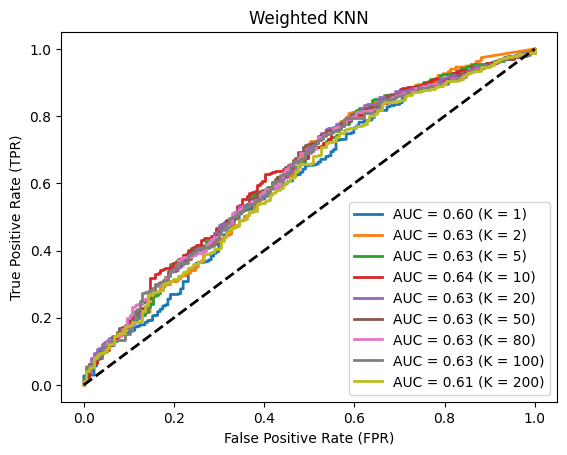

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [227]:
x,y = x_NHANES.drop(index=x_NHANES[x_NHANES['PAQ605'] == 7].index), np.ravel(y_NHANES.drop(index=x_NHANES[x_NHANES['PAQ605'] == 7].index))
x = np.array(x, dtype='float')
y = np.array(y, dtype='int')

# Standardize the feature matrix
x_standardized = (x - x.mean(axis=0)) / x.std(axis=0)

# feature RIAGENDR has a low mean differnce therefor we omit them
selected_x_standardized = np.delete(x_standardized, [0], axis=1)

x_train, x_test, y_train, y_test = train_test_split(selected_x_standardized, y, test_size=0.5, random_state=42)

subset_K = np.array([1,2,5,10,20,50,80,100,200])
for k in subset_K:
  model = Weighted_KNN(K=k)
  y_pred, y_prob, knns = model.fit(x_train, y_train).predict(x_test)
  # print('knns shape:', knns.shape)
  # print('y_prob shape:', y_prob.shape)

  accuracy = evaluate_acc(y_test, y_pred)
  print(f'\nFor K = {k} accuracy is {accuracy*100:.1f}.\n')

  #boolean array to later slice the indexes of correct and incorrect predictions
  correct = y_test == y_pred
  incorrect = np.logical_not(correct)

  fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,-1])
  roc_auc = auc(fpr, tpr)

  # Plotting the ROC curve
  plt.plot(fpr, tpr, lw=2, label=f'AUC = {roc_auc:.2f} (K = {k})')
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title('Weighted KNN')
  plt.legend(loc='lower right' )
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='dummy AUC = 0.5')
plt.savefig(f'nh_wknn_k.png', bbox_inches='tight')
plt.show()
files.download(f'nh_wknn_k.png')

### **Weighted KNN same distance functions**



For distfn = manhattan accuracy is 84.5.


For distfn = euclidean accuracy is 84.5.


For distfn = minkowski accuracy is 84.3.


For distfn = cosine accuracy is 84.5.


For distfn = correlation accuracy is 84.0.



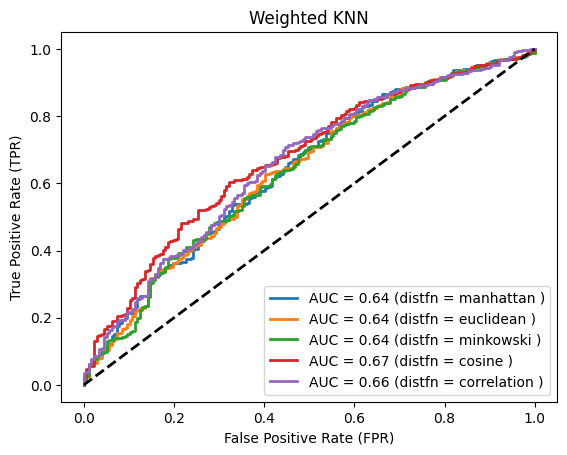

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [228]:
x,y = x_NHANES.drop(index=x_NHANES[x_NHANES['PAQ605'] == 7].index), np.ravel(y_NHANES.drop(index=x_NHANES[x_NHANES['PAQ605'] == 7].index))
x = np.array(x, dtype='float')
y = np.array(y, dtype='int')

# Standardize the feature matrix
x_standardized = (x - x.mean(axis=0)) / x.std(axis=0)

# feature RIAGENDR has a low mean differnce therefor we omit them
selected_x_standardized = np.delete(x_standardized, [0], axis=1)

x_train, x_test, y_train, y_test = train_test_split(selected_x_standardized, y, test_size=0.5, random_state=42)

distfn_subset = [(manhattan,"manhattan"), (euclidean,"euclidean"), (minkowski,"minkowski"), (cosine,"cosine"), (correlation,"correlation")]

k = 10
for (fn,fn_name) in distfn_subset:
  model = Weighted_KNN(K=k, dist_fn=fn)
  y_pred, y_prob, knns = model.fit(x_train, y_train).predict(x_test)

  # print('knns shape:', knns.shape)
  # print('y_prob shape:', y_prob.shape)

  accuracy = evaluate_acc(y_test, y_pred)
  print(f'\nFor distfn = {fn_name} accuracy is {accuracy*100:.1f}.\n')

  #boolean array to later slice the indexes of correct and incorrect predictions
  correct = y_test == y_pred
  incorrect = np.logical_not(correct)

  fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,-1])
  roc_auc = auc(fpr, tpr)


  # Plotting the ROC curve
  plt.plot(fpr, tpr, lw=2, label=f'AUC = {roc_auc:.2f} (distfn = {fn_name} )')
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title('Weighted KNN')
  plt.legend(loc='lower right' )
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='dummy AUC = 0.5')
plt.savefig(f'nh_wknn_dis.png', bbox_inches='tight')
plt.show()
files.download(f'nh_wknn_dis.png')

### **BCW dataset train-test split**


In [229]:
x,y = x_BCW, np.ravel(y_BCW)
x = np.array(x, dtype='float')
y = np.array(y, dtype='int')

# Normalize the feature matrix
x_normalized = (x - x.mean(axis=0)) / x.std(axis=0)

x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.5, random_state=42)

### **Run the experiment for different k**



For K = 1 accuracy is 95.1.


For K = 2 accuracy is 92.9.


For K = 5 accuracy is 96.3.


For K = 10 accuracy is 96.3.


For K = 20 accuracy is 96.6.



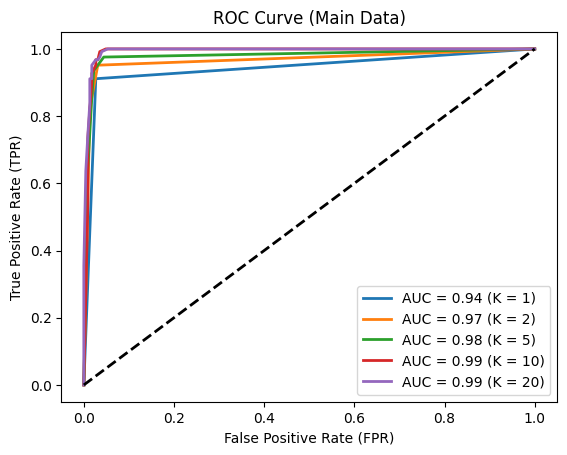

In [230]:
subset_K = np.array([1,2,5,10,20])
for k in subset_K:
  model = KNN(K=k)
  # print(len(y_train))
  y_pred, y_prob, knns = model.fit(x_train, y_train).predict(x_test)
  # print('knns shape:', knns.shape)
  # print('y_prob shape:', y_prob.shape)

  accuracy = evaluate_acc(y_test, y_pred)
  print(f'\nFor K = {k} accuracy is {accuracy*100:.1f}.\n')

  #boolean array to later slice the indexes of correct and incorrect predictions
  correct = y_test == y_pred
  incorrect = np.logical_not(correct)

  fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,-1])
  roc_auc = auc(fpr, tpr)


  # Plotting the ROC curve
  plt.plot(fpr, tpr, lw=2, label=f'AUC = {roc_auc:.2f} (K = {k})')
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title('ROC Curve (Main Data)')
  plt.legend(loc='lower right' )
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='dummy AUC = 0.5')
# plt.savefig(f'bc_initial.png', bbox_inches='tight')
plt.show()
# files.download(f'bc_initial.png')


### **Dropping the duplicates**


For K = 1 accuracy is 91.8.


For K = 2 accuracy is 90.9.


For K = 5 accuracy is 93.5.


For K = 10 accuracy is 92.7.


For K = 20 accuracy is 93.1.



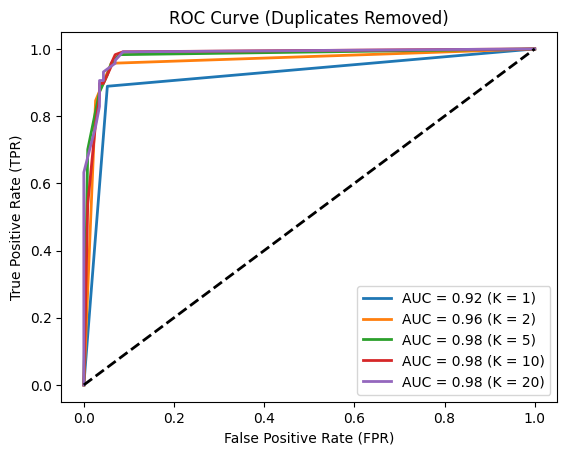

In [231]:
BCW_combined = pd.concat([x_BCW, y_BCW], axis=1)
# Identify and drop duplicate rows based on features and drop
BCW_cleaned = BCW_combined.drop_duplicates()

x,y = BCW_cleaned[x_BCW.columns], np.ravel(BCW_cleaned[y_BCW.columns])
x = np.array(x, dtype='float')
y = np.array(y, dtype='int')

# Standardize the feature matrix
x_standardized = (x - x.mean(axis=0)) / x.std(axis=0)

x_train, x_test, y_train, y_test = train_test_split(x_standardized, y, test_size=0.5, random_state=42)
# len(NHANES_df)

subset_K = np.array([1,2,5,10,20])
for k in subset_K:
  model = KNN(K=k)
  y_pred, y_prob, knns = model.fit(x_train, y_train).predict(x_test)
  # print('knns shape:', knns.shape)
  # print('y_prob shape:', y_prob.shape)

  accuracy = evaluate_acc(y_test, y_pred)
  print(f'\nFor K = {k} accuracy is {accuracy*100:.1f}.\n')

  #boolean array to later slice the indexes of correct and incorrect predictions
  correct = y_test == y_pred
  incorrect = np.logical_not(correct)

  fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,-1])
  roc_auc = auc(fpr, tpr)

  # Plotting the ROC curve
  plt.plot(fpr, tpr, lw=2, label=f'AUC = {roc_auc:.2f} (K = {k})')
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title('ROC Curve (Duplicates Removed)')
  plt.legend(loc='lower right' )
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='dummy AUC = 0.5')
# plt.savefig(f'bc_dropdup.png', bbox_inches='tight')
plt.show()
# files.download(f'bc_dropdup.png')


### **Effect of feature selection: B1) Using the mean (BCW Dataset)**



For K = 1 accuracy is 92.7.


For K = 2 accuracy is 91.4.


For K = 5 accuracy is 93.5.


For K = 10 accuracy is 93.1.


For K = 20 accuracy is 94.0.



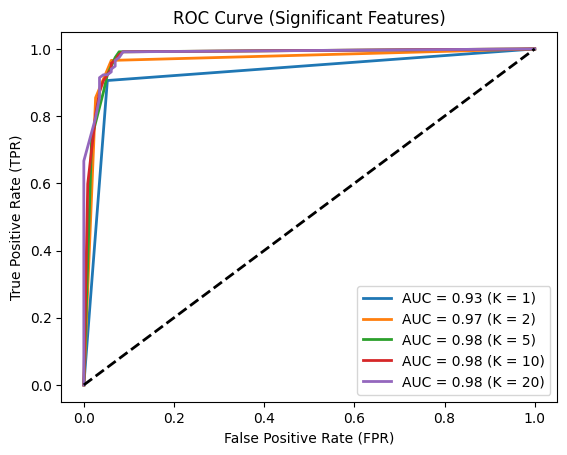

In [232]:
BCW_combined = pd.concat([x_BCW, y_BCW], axis=1)
# Identify and drop duplicate rows based on features and drop
BCW_cleaned = BCW_combined.drop_duplicates()

x,y = BCW_cleaned[x_BCW.columns], np.ravel(BCW_cleaned[y_BCW.columns])

x = np.array(x, dtype='float')
y = np.array(y, dtype='int')

# Standardize the feature matrix
x_standardized = (x - x.mean(axis=0)) / x.std(axis=0)

# feature Mitoses has a lower mean differnce therefor we omit it
selected_x_standardized = np.delete(x_standardized, [8], axis=1)

x_train, x_test, y_train, y_test = train_test_split(selected_x_standardized, y, test_size=0.5, random_state=42)

subset_K = np.array([1,2,5,10,20])
for k in subset_K:
  model = KNN(K=k)
  y_pred, y_prob, knns = model.fit(x_train, y_train).predict(x_test)
  # print('knns shape:', knns.shape)
  # print('y_prob shape:', y_prob.shape)

  accuracy = evaluate_acc(y_test, y_pred)
  print(f'\nFor K = {k} accuracy is {accuracy*100:.1f}.\n')

  #boolean array to later slice the indexes of correct and incorrect predictions
  correct = y_test == y_pred
  incorrect = np.logical_not(correct)

  fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,-1])
  roc_auc = auc(fpr, tpr)


  # Plotting the ROC curve
  plt.plot(fpr, tpr, lw=2, label=f'AUC = {roc_auc:.2f} (K = {k})')
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title('ROC Curve (Significant Features)')
  plt.legend(loc='lower right' )
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='dummy AUC = 0.5')
# plt.savefig(f'bc_mean.png', bbox_inches='tight')
plt.show()
# files.download(f'bc_mean.png')


### **Effect of feature selection: B2) Using the correlation (BCW Dataset)**


In [233]:
BCW_combined = pd.concat([x_BCW, y_BCW], axis=1)
# Identify and drop duplicate rows based on features and drop
BCW_cleaned = BCW_combined.drop_duplicates()

x,y = BCW_cleaned[x_BCW.columns], np.ravel(BCW_cleaned[y_BCW.columns])
x = np.array(x, dtype='float')
y = np.array(y, dtype='int')

num_features = x.shape[1]
features_names = x_BCW.columns.to_numpy()
features_corr_abs = abs(np.array([np.corrcoef(x[:, i], y)[0, 1] for i in range(num_features)]))

# Get the indices that would sort the data in descending order
sorted_indices = np.argsort(features_corr_abs)[::-1]

# Sort the data and features' names using the sorted indices
sorted_features_corr_abs = features_corr_abs[sorted_indices]
sorted_features = features_names[sorted_indices]
print("Sorted correlation coef for each standardized feature:):\n", np.column_stack((sorted_features, sorted_features_corr_abs.astype(str))))

Sorted correlation coef for each standardized feature:):
 [['Uniformity_of_cell_shape' '0.7579320737920885']
 ['Uniformity_of_cell_size' '0.7576230918462913']
 ['Bare_nuclei' '0.7542223145561285']
 ['Bland_chromatin' '0.707165563516454']
 ['Clump_thickness' '0.6757475231727379']
 ['Normal_nucleoli' '0.639908563100285']
 ['Marginal_adhesion' '0.6223712296665836']
 ['Single_epithelial_cell_size' '0.6047092020596737']
 ['Mitoses' '0.3604326711282102']]


### **Run the experiment for different distance functions**



For distfn = manhattan accuracy is 93.5.


For distfn = euclidean accuracy is 93.1.


For distfn = minkowski accuracy is 92.7.


For distfn = cosine accuracy is 94.4.


For distfn = correlation accuracy is 79.3.



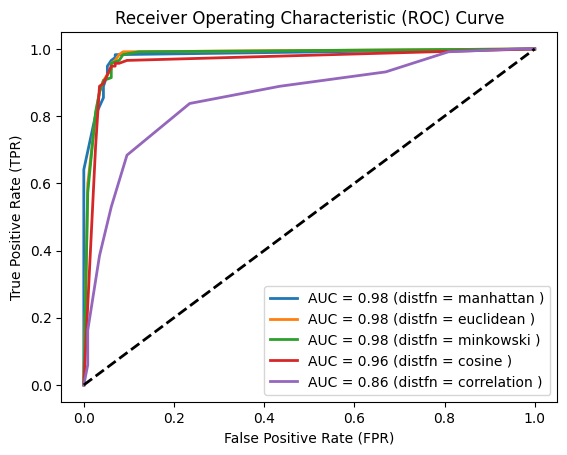

In [234]:
BCW_combined = pd.concat([x_BCW, y_BCW], axis=1)
# Identify and drop duplicate rows based on features and drop
BCW_cleaned = BCW_combined.drop_duplicates()

x,y = BCW_cleaned[x_BCW.columns], np.ravel(BCW_cleaned[y_BCW.columns])

x = np.array(x, dtype='float')
y = np.array(y, dtype='int')

# Standardize the feature matrix
x_standardized = (x - x.mean(axis=0)) / x.std(axis=0)

# feature Mitoses has a lower mean differnce therefor we omit it
selected_x_standardized = np.delete(x_standardized, [8], axis=1)

x_train, x_test, y_train, y_test = train_test_split(selected_x_standardized, y, test_size=0.5, random_state=42)

distfn_subset = [(manhattan,"manhattan"), (euclidean,"euclidean"), (minkowski,"minkowski"), (cosine,"cosine"), (correlation,"correlation")]
k = 10
for (fn,fn_name) in distfn_subset:
  model = KNN(K=k, dist_fn=fn)
  y_pred, y_prob, knns = model.fit(x_train, y_train).predict(x_test)

  # print('knns shape:', knns.shape)
  # print('y_prob shape:', y_prob.shape)

  accuracy = evaluate_acc(y_test, y_pred)
  print(f'\nFor distfn = {fn_name} accuracy is {accuracy*100:.1f}.\n')

  #boolean array to later slice the indexes of correct and incorrect predictions
  correct = y_test == y_pred
  incorrect = np.logical_not(correct)

  fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,-1])
  roc_auc = auc(fpr, tpr)

  # Plotting the ROC curve
  plt.plot(fpr, tpr, lw=2, label=f'AUC = {roc_auc:.2f} (distfn = {fn_name} )')
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right' )
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='dummy AUC = 0.5')
# plt.savefig(f'bc_dist.png', bbox_inches='tight')
plt.show()
# files.download(f'bc_dist.png')

### **AUC, Accuracy based on K and distance functions**


5it [00:07,  1.59s/it]


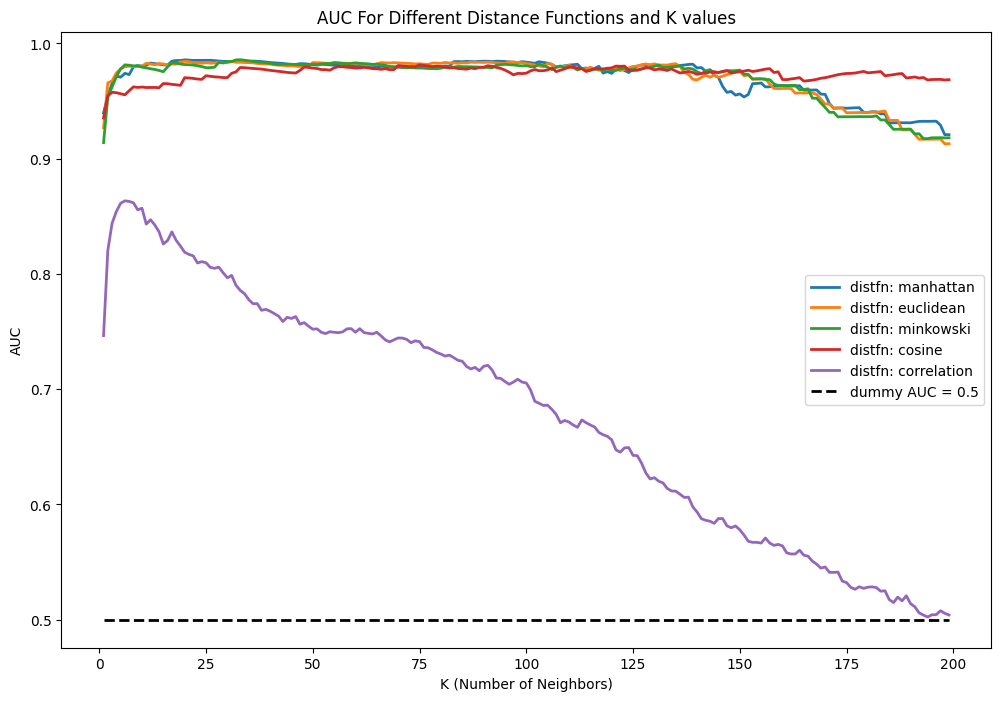

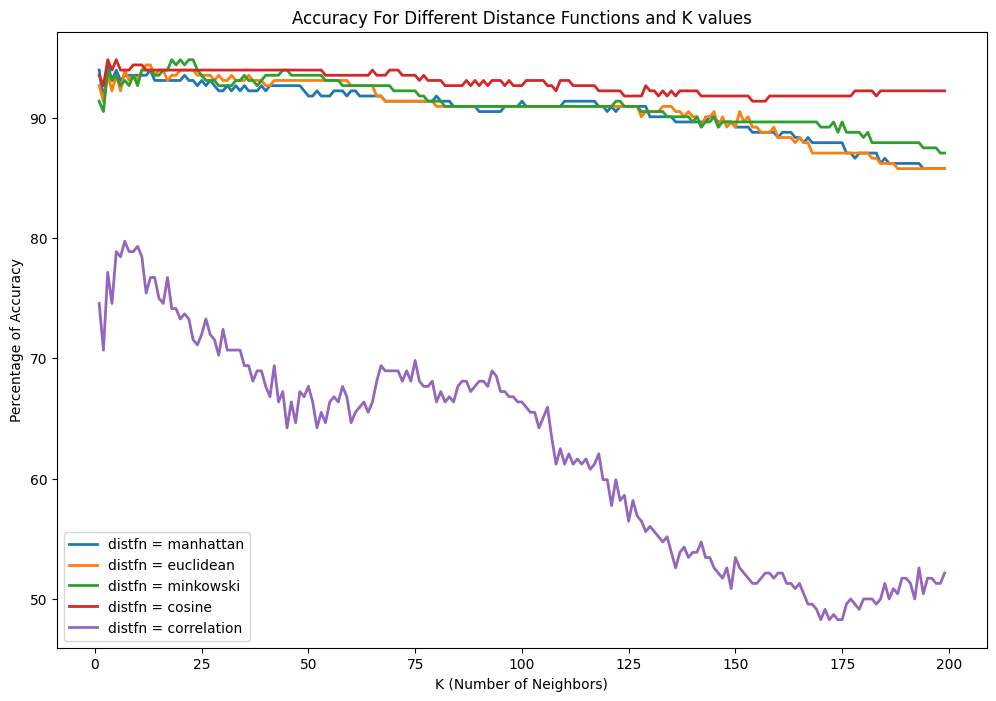

In [235]:
BCW_combined = pd.concat([x_BCW, y_BCW], axis=1)
# Identify and drop duplicate rows based on features and drop
BCW_cleaned = BCW_combined.drop_duplicates()

x,y = BCW_cleaned[x_BCW.columns], np.ravel(BCW_cleaned[y_BCW.columns])

x = np.array(x, dtype='float')
y = np.array(y, dtype='int')

# Standardize the feature matrix
x_standardized = (x - x.mean(axis=0)) / x.std(axis=0)

# feature Mitoses has a lower mean differnce therefor we omit it
selected_x_standardized = np.delete(x_standardized, [8], axis=1)

x_train, x_test, y_train, y_test = train_test_split(selected_x_standardized, y, test_size=0.5, random_state=42)

distfn_subset = [(manhattan,"manhattan"), (euclidean,"euclidean"), (minkowski,"minkowski"), (cosine,"cosine"), (correlation,"correlation")]
subset_K = np.arange(1, 200)

auc_scores = np.zeros((len(distfn_subset),subset_K.shape[0]))
accuracies = np.zeros((len(distfn_subset),subset_K.shape[0]))

for i, (fn, fn_name) in tqdm(enumerate(distfn_subset)):
  for j,k in enumerate(subset_K):
      model = KNN(K=k, dist_fn=fn)
      y_pred, y_prob, knns = model.fit(x_train, y_train).predict(x_test)

      # print('knns shape:', knns.shape)
      # print('y_prob shape:', y_prob.shape)

      accuracies[i,j] = 100*evaluate_acc(y_test, y_pred)

      #boolean array to later slice the indexes of correct and incorrect predictions
      correct = y_test == y_pred
      incorrect = np.logical_not(correct)

      fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,-1])
      auc_scores[i,j] = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(12, 8))
for i, (fn, fn_name) in enumerate(distfn_subset):

    plt.plot(subset_K, auc_scores[i], lw=2, label=f"distfn: {fn_name}")

    # max_aucs = (auc_scores[i] == auc_scores[i].max())
    # first_true_max_aucs = np.argmax(max_aucs)

    # max_accs = (accuracies[i] == accuracies[i].max())
    # first_true_max_accs = np.argmax(max_accs)

    # Plot the max
    # plt.scatter(first_true_max_aucs, auc_scores[i,first_true_max_aucs], marker='x', label=f'max auc ({fn_name},K={k})')
    # plt.text(first_true_max_aucs, auc_scores[i,first_true_max_aucs], f'({fn_name}, {first_true_max_aucs:.2f})', color='black', ha='left', va='bottom')


plt.plot(np.arange(subset_K.min(),subset_K.max()+1), 0.5*np.ones((auc_scores.shape[1])), color='black', lw=2, linestyle='--', label='dummy AUC = 0.5')


plt.xlabel('K (Number of Neighbors)')
plt.ylabel('AUC')
plt.title('AUC For Different Distance Functions and K values')
plt.legend()
# plt.savefig(f'bc_auc_k_dist.png', bbox_inches='tight')
plt.show()
# files.download(f'bc_auc_k_dist.png')

print("\n")
plt.figure(figsize=(12, 8))
for i, (fn, fn_name) in enumerate(distfn_subset):
    plt.plot(subset_K, accuracies[i], lw=2, label=f"distfn = {fn_name}")

    # # Plot the max
    # max_accs = (accuracies[i] == accuracies[i].max())
    # first_true_max_accs = np.argmax(max_accs)

    # # Plot the max
    # plt.scatter(first_true_max_accs, accuracies[i,first_true_max_accs], marker='x', label=f'max auc ({fn_name},K={k})')
    # # plt.text(first_true_max_accs, accuracies[i,first_true_max_accs], f'({fn_name}, {first_true_max_accs:.2f})', color='black', ha='left', va='bottom')

# plt.plot(np.arange(subset_K.min(),subset_K.max()+1), 50*np.ones((accuracies.shape[1])), color='black', lw=2, linestyle='--', label='dummy AUC = 0.5')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Percentage of Accuracy')
plt.title('Accuracy For Different Distance Functions and K values')
plt.legend()
# plt.savefig(f'bc_acc_k_dist.png', bbox_inches='tight')
plt.show()
# files.download(f'bc_acc_k_dist.png')


### **KNN and DT comparison**


## **NHANES Dataset**



KNN accuracy is 84.5.


DT accuracy is 84.3.



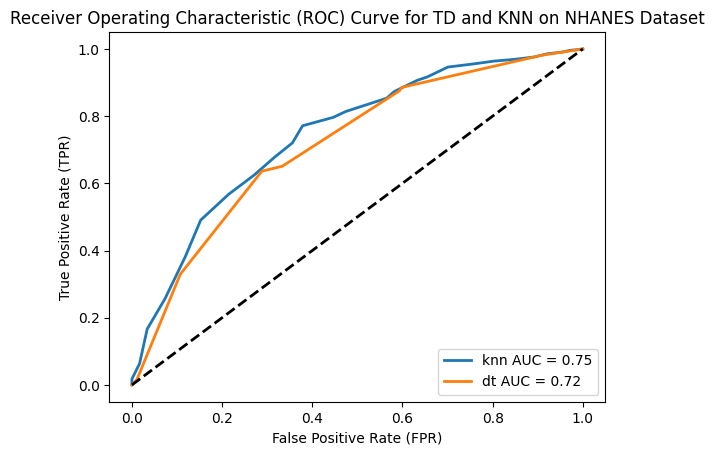

In [236]:

x,y = x_NHANES.drop(index=x_NHANES[x_NHANES['PAQ605'] == 7].index), np.ravel(y_NHANES.drop(index=x_NHANES[x_NHANES['PAQ605'] == 7].index))
x = np.array(x, dtype='float')
y = np.array(y, dtype='int')

# Standardize the feature matrix
x_standardized = (x - x.mean(axis=0)) / x.std(axis=0)

x_train, x_test, y_train, y_test = train_test_split(x_standardized, y, test_size=0.5, random_state=42)
# len(NHANES_df)

k = 60
fn = cosine
model = KNN(K=k, dist_fn=fn)
y_pred_knn, y_prob_knn, knns = model.fit(x_train, y_train).predict(x_test)

accuracy_knn = evaluate_acc(y_test, y_pred_knn)
print(f'\nKNN accuracy is {accuracy_knn*100:.1f}.\n')

#boolean array to later slice the indexes of correct and incorrect predictions
correct_knn = y_test == y_pred_knn
incorrect_knn = np.logical_not(correct_knn)

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn[:,-1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

d = 3
cost_fn = cost_gini_index
model = DecisionTree(max_depth=d, cost_fn=cost_fn)
y_prob_dt = model.fit(x_train, y_train).predict(x_test)
y_pred_dt = np.argmax(y_prob_dt, axis=-1)
accuracy_dt = np.sum(y_pred_dt == y_test)/y_test.shape[0]

print(f'\nDT accuracy is {accuracy_dt*100:.1f}.\n')

#boolean array to later slice the indexes of correct and incorrect predictions
correct_dt = y_test == y_pred_dt
incorrect_dt = np.logical_not(correct_dt)

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt[:,-1])
roc_auc_dt = auc(fpr_dt, tpr_dt)


# Plotting the ROC curve
plt.plot(fpr_knn, tpr_knn, lw=2, label=f'knn AUC = {roc_auc_knn:.2f}')
plt.plot(fpr_dt, tpr_dt, lw=2, label=f'dt AUC = {roc_auc_dt:.2f}')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for TD and KNN on NHANES Dataset')
plt.legend(loc='lower right' )
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='dummy AUC = 0.5')
# plt.savefig(f'initial_{k}.png', bbox_inches='tight')
plt.show()
# files.download(f'initial_{k}.png')


## **BCW Dataset**



KNN accuracy is 93.5.


DT accuracy is 93.5.



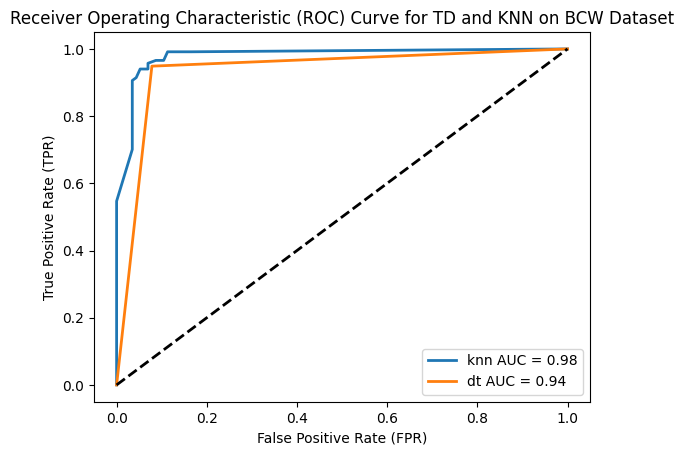

In [237]:
BCW_combined = pd.concat([x_BCW, y_BCW], axis=1)
# Identify and drop duplicate rows based on features and drop
BCW_cleaned = BCW_combined.drop_duplicates()

x,y = BCW_cleaned[x_BCW.columns], np.ravel(BCW_cleaned[y_BCW.columns])

x = np.array(x, dtype='float')
y = np.array(y, dtype='int')

# Standardize the feature matrix
x_standardized = (x - x.mean(axis=0)) / x.std(axis=0)

# feature Mitoses has a lower mean differnce therefor we omit it
selected_x_standardized = np.delete(x_standardized, [8], axis=1)

x_train, x_test, y_train, y_test = train_test_split(selected_x_standardized, y, test_size=0.5, random_state=42)

k = 25
fn = minkowski
model = KNN(K=k, dist_fn=fn)
y_pred_knn, y_prob_knn, knns = model.fit(x_train, y_train).predict(x_test)

accuracy_knn = evaluate_acc(y_test, y_pred_knn)
print(f'\nKNN accuracy is {accuracy_knn*100:.1f}.\n')

#boolean array to later slice the indexes of correct and incorrect predictions
correct_knn = y_test == y_pred_knn
incorrect_knn = np.logical_not(correct_knn)

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn[:,-1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

d = 5
cost_fn = cost_gini_index
model = DecisionTree(max_depth=d, cost_fn=cost_fn)
y_prob_dt = model.fit(x_train, y_train).predict(x_test)
y_pred_dt = np.argmax(y_prob_dt, axis=-1)
accuracy_dt = np.sum(y_pred_dt == y_test)/y_test.shape[0]

print(f'\nDT accuracy is {accuracy_dt*100:.1f}.\n')

#boolean array to later slice the indexes of correct and incorrect predictions
correct_dt = y_test == y_pred_dt
incorrect_dt = np.logical_not(correct_dt)

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt[:,-1])
roc_auc_dt = auc(fpr_dt, tpr_dt)


# Plotting the ROC curve
plt.plot(fpr_knn, tpr_knn, lw=2, label=f'knn AUC = {roc_auc_knn:.2f}')
plt.plot(fpr_dt, tpr_dt, lw=2, label=f'dt AUC = {roc_auc_dt:.2f}')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for TD and KNN on BCW Dataset')
plt.legend(loc='lower right' )
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='dummy AUC = 0.5')
# plt.savefig(f'initial_{k}.png', bbox_inches='tight')
plt.show()
# files.download(f'initial_{k}.png')